# Load Libraries

In [13]:
#Importing all the necessary packages
import resreg
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error, f1_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve, plot_cumulative_gain
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import specificity_score, sensitivity_score
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate
from scikitplot.metrics import plot_lift_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge,  LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from dmba import stepwise_selection, regressionSummary, classificationSummary, backward_elimination
from sklearn.decomposition import PCA
from sklearn.utils.random import sample_without_replacement
from pandas.plotting import parallel_coordinates
from sklearn.metrics import precision_score, recall_score


In [450]:
from sklearn.metrics import log_loss
from scipy.stats import chi2

# Load Data from Machine Location

## Un-matched dataset

In [349]:
#Load dataset
pcs = pd.read_csv(r'C:\Users\Halee\Downloads\final_data.csv')
pcs.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,Healthy,10,2,0,4,1.0,0.0,Before,0,17.0
1,Vet,57,Male,Man,Asian,Non,1,0,0,Emp,...,Healthy,3,0,0,2,2.0,3.0,Before,1,8.0
2,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,Healthy,10,1,2,2,1.0,0.0,Before,1,8.0
3,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,Healthy,87,1,1,3,3.0,0.0,Before,0,18.0
4,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,PASC,24,0,0,4,2.0,2.0,After,1,12.0


In [350]:
pcs.shape

(793, 36)

## Matched dataset

In [351]:
# Load matched dataset
pcs_m = pd.read_csv(r'C:\Users\Halee\Downloads\match_data.csv')
pcs_m.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,Healthy,10,2,0,4,1.0,0.0,Before,0,17
1,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,Healthy,10,1,2,2,1.0,0.0,Before,1,8
2,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,Healthy,87,1,1,3,3.0,0.0,Before,0,18
3,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,PASC,24,0,0,4,2.0,2.0,After,1,12
4,Vet,50,Male,Man,White,Non,1,0,0,Emp,...,Healthy,3,1,0,2,2.0,3.0,Before,0,8


## Cognitive Data Only

In [352]:
pcs_c = pd.read_csv(r'C:\Users\Halee\Downloads\cog_data2.csv')
pcs_c.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,rat_m_acc,rat_h_rt_mn,rat_h_rt_sd,rat_h_acc,sus_att,cpt_profile,vacc_bi,cardio_bi,cluster,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,0.000000,8905.660000,5712.871910,0.000000,1.0,0.0,Before,0,2,17.0
1,Vet,57,Male,Man,Asian,Non,1,0,0,Emp,...,0.500000,112371.000000,152353.481738,0.333333,2.0,3.0,Before,1,4,8.0
2,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,0.666667,6677.633333,1230.960244,0.333333,1.0,0.0,Before,1,4,8.0
3,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,0.333333,9334.533333,6190.750328,0.000000,3.0,0.0,Before,0,4,18.0
4,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,0.400000,33344.500000,33970.473297,0.333333,2.0,2.0,After,1,5,12.0


# Visual Search Data

In [353]:
pcs_vs = pd.read_csv(r'C:\Users\Halee\Downloads\subj_data.txt', delimiter = "\t")
pcs_vs.head()

,subjid,age,sex,promis_score,cog_group,rt,resp,array,cond,diag_group
0,04md12ua,68,Male,8,none/mild,0.697,1,small,Absent,LongCOVID
1,04md12ua,68,Male,8,none/mild,1.198,1,large,Absent,LongCOVID
2,04md12ua,68,Male,8,none/mild,1.296,1,large,Absent,LongCOVID
3,04md12ua,68,Male,8,none/mild,0.633,1,small,Present,LongCOVID
4,04md12ua,68,Male,8,none/mild,0.915,1,large,Present,LongCOVID


In [354]:
# Rename columns to fit library requirements
pcs_vs = pcs_vs.rename(columns={"resp": "accuracy"})

# Verify dataframe info

In [355]:
pcs['promis_score'].describe()

count    792.000000
mean      17.758838
std        8.383276
min        8.000000
25%       10.000000
50%       17.000000
75%       23.000000
max       40.000000
Name: promis_score, dtype: float64

In [356]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   sex                    793 non-null    object 
 3   gender                 793 non-null    object 
 4   race                   793 non-null    object 
 5   ethnicity              793 non-null    object 
 6   racial_stress          793 non-null    int64  
 7   nicotine_status        793 non-null    int64  
 8   rehab_status           793 non-null    int64  
 9   unemployment_covid     793 non-null    object 
 10  global_qol_scale       793 non-null    int64  
 11  vaccine_menstrual      793 non-null    object 
 12  med_access             793 non-null    int64  
 13  initial_symptom_score  793 non-null    int64  
 14  pre_pandemic           793 non-null    int64  
 15  hit6_s

In [357]:
pcs_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       298 non-null    object 
 1   age                    298 non-null    int64  
 2   sex                    298 non-null    object 
 3   gender                 298 non-null    object 
 4   race                   298 non-null    object 
 5   ethnicity              298 non-null    object 
 6   racial_stress          298 non-null    int64  
 7   nicotine_status        298 non-null    int64  
 8   rehab_status           298 non-null    int64  
 9   unemployment_covid     298 non-null    object 
 10  global_qol_scale       298 non-null    int64  
 11  vaccine_menstrual      298 non-null    object 
 12  med_access             298 non-null    int64  
 13  initial_symptom_score  298 non-null    int64  
 14  pre_pandemic           298 non-null    int64  
 15  hit6_s

In [358]:
pcs_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   sex                    793 non-null    object 
 3   gender                 793 non-null    object 
 4   race                   793 non-null    object 
 5   ethnicity              793 non-null    object 
 6   racial_stress          793 non-null    int64  
 7   nicotine_status        793 non-null    int64  
 8   rehab_status           793 non-null    int64  
 9   unemployment_covid     793 non-null    object 
 10  global_qol_scale       793 non-null    int64  
 11  vaccine_menstrual      793 non-null    object 
 12  med_access             793 non-null    int64  
 13  initial_symptom_score  793 non-null    int64  
 14  pre_pandemic           793 non-null    int64  
 15  hit6_s

# Cluster Values

In [359]:
# Load matched dataset
clust_df = pd.read_csv(r'C:\Users\Halee\Downloads\clust_df.csv')
clust_df

,p,m,s,l,n,pr
0,0.042,0.00000,0.958,7,12,0.58
1,0.409,0.17200,0.418,115,143,0.80
2,0.012,0.95600,0.032,27,41,0.66
3,0.000,0.00000,0.000,4,404,0.01
4,0.978,0.00596,0.016,58,114,0.51
5,0.562,0.39900,0.039,67,79,0.85


In [360]:
clust_df = clust_df.rename(columns={"p": "Physical", "m": "Mental", "s": "Sleep"})

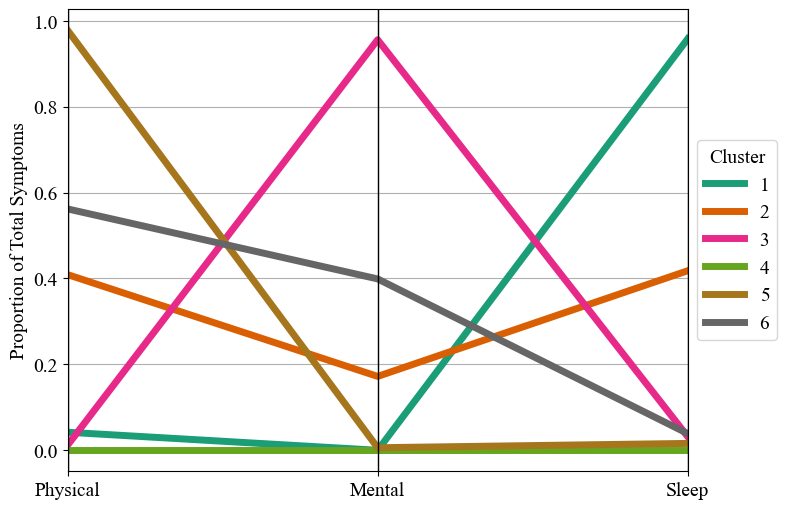

In [361]:
#Visualizing the Centroid Values
clust_list = ['Physical', 'Mental', 'Sleep', 'clust']
clust_df['clust'] = ['Cluster {}'.format(i) for i in clust_df.index]
# Set font properties globally
plt.rc('font', family='Times New Roman', size=14)
plt.figure(figsize = (8,6))
parallel_coordinates(clust_df[clust_list], class_column='clust', colormap = 'Dark2', linewidth = 5)
plt.legend(['1','2','3','4','5','6'], loc='center left', title = 'Cluster', bbox_to_anchor=(1,0.5))
plt.xticks(rotation = 0)
#plt.title('Symptom Phenotype Clusters', fontsize=16)
plt.ylabel('Proportion of Total Symptoms')
plt.savefig('Cluster.png', bbox_inches='tight', dpi=300)

# Verify Outcome Variable Proportions

In [362]:
pcs['pcs_diag'].value_counts()

pcs_diag
Healthy    511
PASC       278
Name: count, dtype: int64

# Udpate data types

In [363]:
pcs['gender'] = pcs['gender'].astype('category')
pcs['race'] = pcs['race'].astype('category')
pcs['ethnicity'] = pcs['ethnicity'].astype('category')
pcs['unemployment_covid'] = pcs['unemployment_covid'].astype('category')
pcs['pcs_diag'] = pcs['pcs_diag'].astype('category')
pcs['tbi_prob'] = pcs['tbi_prob'].astype('category')
pcs['vacc_bi'] = pcs['vacc_bi'].astype('category')
pcs['nicotine_status'] = pcs['nicotine_status'].astype('category')
pcs['rehab_status'] = pcs['rehab_status'].astype('category')
pcs['cardio_bi'] = pcs['cardio_bi'].astype('category')
pcs['cpt_profile'] = pcs['cpt_profile'].astype('category')
pcs['participant_type'] = pcs['participant_type'].astype('category')
pcs['vaccine_menstrual'] = pcs['vaccine_menstrual'].astype('category')
pcs['med_access'] = pcs['med_access'].astype('category')


In [364]:
pcs_m['gender'] = pcs_m['gender'].astype('category')
pcs_m['race'] = pcs_m['race'].astype('category')
pcs_m['ethnicity'] = pcs_m['ethnicity'].astype('category')
pcs_m['unemployment_covid'] = pcs_m['unemployment_covid'].astype('category')
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].astype('category')
pcs_m['tbi_prob'] = pcs_m['tbi_prob'].astype('category')
pcs_m['vacc_bi'] = pcs_m['vacc_bi'].astype('category')
pcs_m['nicotine_status'] = pcs_m['nicotine_status'].astype('category')
pcs_m['rehab_status'] = pcs_m['rehab_status'].astype('category')
pcs_m['cardio_bi'] = pcs_m['cardio_bi'].astype('category')
pcs_m['cpt_profile'] = pcs_m['cpt_profile'].astype('category')
pcs_m['participant_type'] = pcs_m['participant_type'].astype('category')
pcs_m['vaccine_menstrual'] = pcs_m['vaccine_menstrual'].astype('category')
pcs_m['med_access'] = pcs_m['med_access'].astype('category')


In [365]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   participant_type       793 non-null    category
 1   age                    793 non-null    int64   
 2   sex                    793 non-null    object  
 3   gender                 793 non-null    category
 4   race                   793 non-null    category
 5   ethnicity              793 non-null    category
 6   racial_stress          793 non-null    int64   
 7   nicotine_status        793 non-null    category
 8   rehab_status           793 non-null    category
 9   unemployment_covid     793 non-null    category
 10  global_qol_scale       793 non-null    int64   
 11  vaccine_menstrual      793 non-null    category
 12  med_access             793 non-null    category
 13  initial_symptom_score  793 non-null    int64   
 14  pre_pandemic           793 non-null    int

# Define numerical and categorical variables

In [366]:
cats = ['cpt_profile', 'participant_type',
        'gender', 'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 
        'unemployment_covid', 'vaccine_menstrual',
        'tbi_prob', 'vacc_bi', 'cardio_bi',
        'med_access']
nums = ['age',
        'global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        #'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        'racial_stress', 
        'fin_stress',
        'datediff',
        'sus_att'] 
all_vars = cats+nums

# Create Transformation Pipeline

In [367]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats), 
                                            ('num', num_pipe, nums)],
                                          verbose_feature_names_out=False))
# Verify steps
all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'tbi_prob', 'vacc_bi',
                                   'cardio_bi', 'med_access']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['age', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
                                   'promis_score', 'hit6_score', 'fatigue_score',
            

# Split Data into Training and Test Sets for Predictive Model

In [368]:
# Split the data into features (X) and the binary target variable (y).
X = pcs[all_vars]

#Make outcome variable into binary variable
pcs['pcs_diag'] = pcs['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y = pcs[['pcs_diag']]


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

In [369]:
#Confirm stratified split
y_train.value_counts()/len(y_train)

pcs_diag
0           0.654054
1           0.340541
Name: count, dtype: float64

In [370]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 341 to 37
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pcs_diag  552 non-null    category
dtypes: category(1)
memory usage: 5.0 KB


In [371]:
X_train.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
341,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,0,...,26,27,32.8,12,16.0,1,2,4,159.4,2.0
172,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,0,...,0,6,21.0,19,12.0,3,1,6,148.4,3.0
399,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,0,...,0,0,27.6,20,4.0,0,1,2,4.3,2.0
481,NaN,Civ,NonBi,White,Non,0,0,Emp,No/NA,0,...,2,1,44.3,7,8.0,0,2,4,32.1,NaN
103,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,0,...,0,2,30.8,4,14.0,0,2,4,74.1,1.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'global_qol_scale'}>,
        <Axes: title={'center': 'initial_symptom_score'}>,
        <Axes: title={'center': 'pre_pandemic'}>],
       [<Axes: title={'center': 'promis_score'}>,
        <Axes: title={'center': 'hit6_score'}>,
        <Axes: title={'center': 'fatigue_score'}>,
        <Axes: title={'center': 'gad7_tot_score'}>],
       [<Axes: title={'center': 'pss_overall_score'}>,
        <Axes: title={'center': 'social_support_score'}>,
        <Axes: title={'center': 'dvprs_score'}>,
        <Axes: title={'center': 'dyspnoea_12_score'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'psqi_glob'}>,
        <Axes: title={'center': 'mental'}>],
       [<Axes: title={'center': 'racial_stress'}>,
        <Axes: title={'center': 'fin_stress'}>,
        <Axes: title={'center': 'datediff'}>,
        <Axes: title={'center': 'sus_att'}>]], dtyp

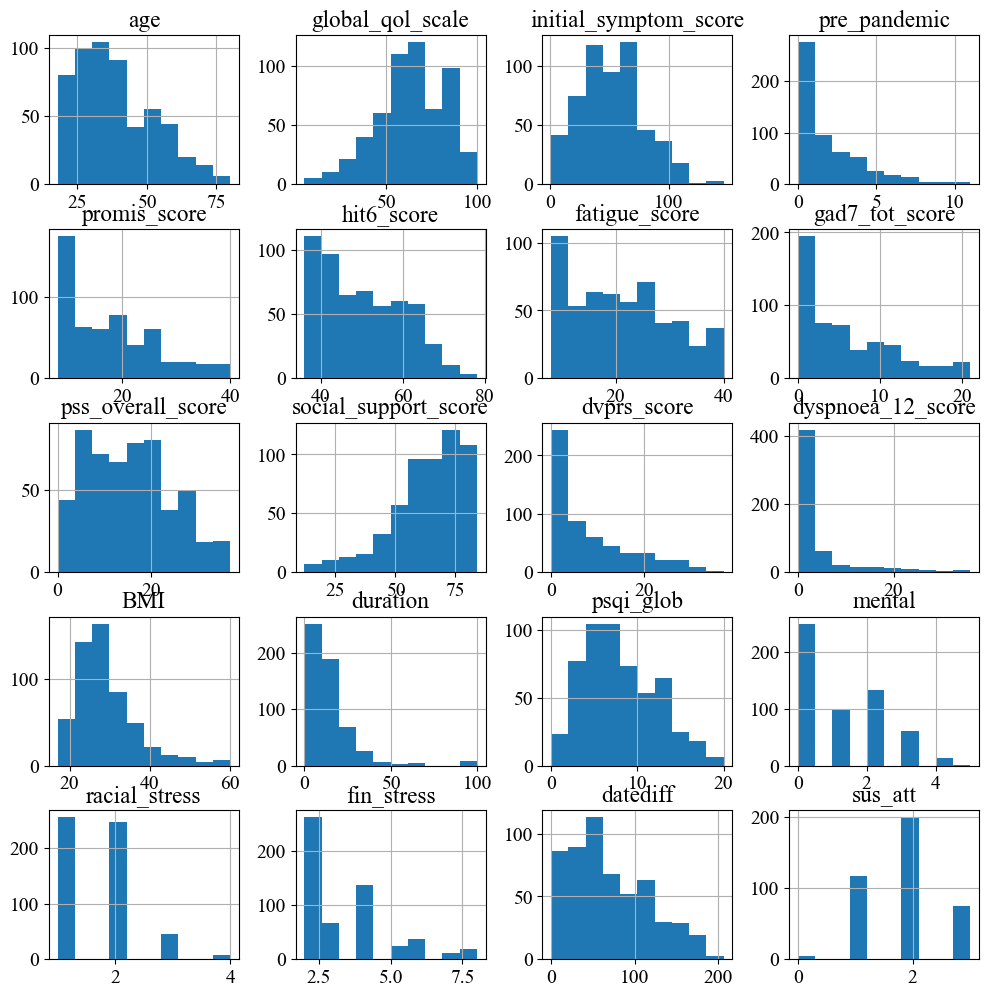

In [372]:
X_train.hist(figsize = (12,12))

In [373]:
X_train.describe()

,age,global_qol_scale,initial_symptom_score,pre_pandemic,promis_score,hit6_score,fatigue_score,gad7_tot_score,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
count,555.000000,555.000000,555.000000,555.000000,554.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,548.000000,555.000000,552.000000,555.000000,555.000000,555.000000,552.000000,395.000000
mean,38.801802,64.306306,51.918919,2.120721,17.552347,50.163964,20.945946,6.028829,15.490090,63.592793,7.807207,3.140541,28.833394,13.927928,7.452899,1.088288,1.645045,3.311712,70.744565,1.873418
std,13.556021,19.360625,26.406273,2.162576,8.408747,9.858391,9.125121,5.644002,8.913007,15.124392,8.760797,6.164273,7.503454,14.030982,4.166406,1.167145,0.683844,1.602724,47.006989,0.715440
min,18.000000,5.000000,1.000000,0.000000,8.000000,36.000000,8.000000,0.000000,0.000000,12.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,28.000000,55.000000,32.000000,0.000000,10.000000,42.000000,13.000000,1.000000,8.000000,56.000000,0.000000,0.000000,23.700000,7.000000,4.000000,0.000000,1.000000,2.000000,32.850000,1.000000
50%,36.000000,70.000000,51.000000,2.000000,16.000000,49.000000,20.000000,5.000000,15.000000,66.000000,5.000000,0.000000,27.400000,10.000000,7.000000,1.000000,2.000000,3.000000,60.350000,2.000000
75%,48.500000,80.000000,68.000000,3.000000,23.000000,58.000000,28.000000,10.000000,22.000000,74.000000,13.000000,3.000000,32.200000,16.000000,10.000000,2.000000,2.000000,4.000000,104.950000,2.000000
max,80.000000,100.000000,146.000000,11.000000,40.000000,78.000000,40.000000,21.000000,37.000000,84.000000,37.000000,36.000000,60.000000,100.000000,20.000000,5.000000,4.000000,8.000000,206.400000,3.000000


# Impute missing values

In [374]:
X_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_train), 
                           columns = X_train.columns.to_list())
X_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_test),
                         columns = X_test.columns.to_list())

In [375]:
X_train_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
0,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,0,...,26,27,32.8,12,16.0,1,2,4,159.4,2.0
1,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,0,...,0,6,21.0,19,12.0,3,1,6,148.4,3.0
2,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,0,...,0,0,27.6,20,4.0,0,1,2,4.3,2.0
3,0.0,Civ,NonBi,White,Non,0,0,Emp,No/NA,0,...,2,1,44.3,7,8.0,0,2,4,32.1,2.0
4,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,0,...,0,2,30.8,4,14.0,0,2,4,74.1,1.0


In [376]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            555 non-null    object
 1   participant_type       555 non-null    object
 2   gender                 555 non-null    object
 3   race                   555 non-null    object
 4   ethnicity              555 non-null    object
 5   nicotine_status        555 non-null    object
 6   rehab_status           555 non-null    object
 7   unemployment_covid     555 non-null    object
 8   vaccine_menstrual      555 non-null    object
 9   tbi_prob               555 non-null    object
 10  vacc_bi                555 non-null    object
 11  cardio_bi              555 non-null    object
 12  med_access             555 non-null    object
 13  age                    555 non-null    object
 14  global_qol_scale       555 non-null    object
 15  initial_symptom_score  

In [377]:
#update data types
X_train_imp['gender'] = X_train_imp['gender'].astype('category')
X_train_imp['race'] = X_train_imp['race'].astype('category')
X_train_imp['ethnicity'] = X_train_imp['ethnicity'].astype('category')
X_train_imp['unemployment_covid'] = X_train_imp['unemployment_covid'].astype('category')
X_train_imp['tbi_prob'] = X_train_imp['tbi_prob'].astype('category')
X_train_imp['vacc_bi'] = X_train_imp['vacc_bi'].astype('category')
X_train_imp['nicotine_status'] = X_train_imp['nicotine_status'].astype('category')
X_train_imp['rehab_status'] = X_train_imp['rehab_status'].astype('category')
X_train_imp['cardio_bi'] = X_train_imp['cardio_bi'].astype('category')
X_train_imp['cpt_profile'] = X_train_imp['cpt_profile'].astype('category')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('category')
X_train_imp['participant_type'] = X_train_imp['participant_type'].astype('category')
X_train_imp['vaccine_menstrual'] = X_train_imp['vaccine_menstrual'].astype('category')
X_train_imp['med_access'] = X_train_imp['med_access'].astype('category')

X_train_imp['age'] = X_train_imp['age'].astype('int64')
X_train_imp['global_qol_scale'] = X_train_imp['global_qol_scale'].astype('int64')
X_train_imp['initial_symptom_score'] = X_train_imp['initial_symptom_score'].astype('int64')
X_train_imp['pre_pandemic'] = X_train_imp['pre_pandemic'].astype('int64')
X_train_imp['promis_score'] = X_train_imp['promis_score'].astype('int64')
X_train_imp['hit6_score'] = X_train_imp['hit6_score'].astype('int64')
X_train_imp['fatigue_score'] = X_train_imp['fatigue_score'].astype('int64')
X_train_imp['gad7_tot_score'] = X_train_imp['gad7_tot_score'].astype('int64')
#X_train_imp['phq9_total'] = X_train_imp['phq9_total'].astype('int64')
X_train_imp['pss_overall_score'] = X_train_imp['pss_overall_score'].astype('int64')
X_train_imp['social_support_score'] = X_train_imp['social_support_score'].astype('int64')
X_train_imp['dvprs_score'] = X_train_imp['dvprs_score'].astype('int64')
X_train_imp['dyspnoea_12_score'] = X_train_imp['dyspnoea_12_score'].astype('int64')
X_train_imp['BMI'] = X_train_imp['BMI'].astype('int64')
X_train_imp['duration'] = X_train_imp['duration'].astype('int64')
X_train_imp['psqi_glob'] = X_train_imp['psqi_glob'].astype('int64')
X_train_imp['mental'] = X_train_imp['mental'].astype('int64')
X_train_imp['racial_stress'] = X_train_imp['racial_stress'].astype('int64')
X_train_imp['fin_stress'] = X_train_imp['fin_stress'].astype('int64')
X_train_imp['datediff'] = X_train_imp['datediff'].astype('int64')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('int64')

In [378]:
X_test_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
0,3.0,Vet,Woman,White,Non,0,0,Unemp,No/NA,0,...,21,0,30.0,5,11.0,3,1,3,33.3,2.0
1,0.0,Civ,Man,White,Non,1,0,Emp,No/NA,1,...,0,0,25.5,8,12.0,2,1,2,55.6,2.0
2,0.0,Civ,Woman,More,His/LatX,1,0,Emp,No/NA,0,...,9,0,24.8,10,7.0,1,2,2,40.0,2.0
3,0.0,Civ,Woman,White,Non,1,0,Emp,No/NA,0,...,5,0,33.9,2,4.0,3,1,2,80.1,2.0
4,0.0,Civ,Woman,White,Non,1,0,Unemp,No/NA,1,...,4,2,40.7,14,3.0,1,1,4,42.4,2.0


In [379]:
X_test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            238 non-null    object
 1   participant_type       238 non-null    object
 2   gender                 238 non-null    object
 3   race                   238 non-null    object
 4   ethnicity              238 non-null    object
 5   nicotine_status        238 non-null    object
 6   rehab_status           238 non-null    object
 7   unemployment_covid     238 non-null    object
 8   vaccine_menstrual      238 non-null    object
 9   tbi_prob               238 non-null    object
 10  vacc_bi                238 non-null    object
 11  cardio_bi              238 non-null    object
 12  med_access             238 non-null    object
 13  age                    238 non-null    object
 14  global_qol_scale       238 non-null    object
 15  initial_symptom_score  

In [380]:
#update data types
X_test_imp['gender'] = X_test_imp['gender'].astype('category')
X_test_imp['race'] = X_test_imp['race'].astype('category')
X_test_imp['ethnicity'] = X_test_imp['ethnicity'].astype('category')
X_test_imp['unemployment_covid'] = X_test_imp['unemployment_covid'].astype('category')
X_test_imp['tbi_prob'] = X_test_imp['tbi_prob'].astype('category')
X_test_imp['vacc_bi'] = X_test_imp['vacc_bi'].astype('category')
X_test_imp['nicotine_status'] = X_test_imp['nicotine_status'].astype('category')
X_test_imp['rehab_status'] = X_test_imp['rehab_status'].astype('category')
X_test_imp['cardio_bi'] = X_test_imp['cardio_bi'].astype('category')
X_test_imp['cpt_profile'] = X_test_imp['cpt_profile'].astype('category')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('category')
X_test_imp['participant_type'] = X_test_imp['participant_type'].astype('category')
X_test_imp['vaccine_menstrual'] = X_test_imp['vaccine_menstrual'].astype('category')
X_test_imp['med_access'] = X_test_imp['med_access'].astype('category')

X_test_imp['age'] = X_test_imp['age'].astype('int64')
X_test_imp['global_qol_scale'] = X_test_imp['global_qol_scale'].astype('int64')
X_test_imp['initial_symptom_score'] = X_test_imp['initial_symptom_score'].astype('int64')
X_test_imp['pre_pandemic'] = X_test_imp['pre_pandemic'].astype('int64')
X_test_imp['promis_score'] = X_test_imp['promis_score'].astype('int64')
X_test_imp['hit6_score'] = X_test_imp['hit6_score'].astype('int64')
X_test_imp['fatigue_score'] = X_test_imp['fatigue_score'].astype('int64')
X_test_imp['gad7_tot_score'] = X_test_imp['gad7_tot_score'].astype('int64')
#X_test_imp['phq9_total'] = X_test_imp['phq9_total'].astype('int64')
X_test_imp['pss_overall_score'] = X_test_imp['pss_overall_score'].astype('int64')
X_test_imp['social_support_score'] = X_test_imp['social_support_score'].astype('int64')
X_test_imp['dvprs_score'] = X_test_imp['dvprs_score'].astype('int64')
X_test_imp['dyspnoea_12_score'] = X_test_imp['dyspnoea_12_score'].astype('int64')
X_test_imp['BMI'] = X_test_imp['BMI'].astype('int64')
X_test_imp['duration'] = X_test_imp['duration'].astype('int64')
X_test_imp['psqi_glob'] = X_test_imp['psqi_glob'].astype('int64')
X_test_imp['mental'] = X_test_imp['mental'].astype('int64')
X_test_imp['racial_stress'] = X_test_imp['racial_stress'].astype('int64')
X_test_imp['fin_stress'] = X_test_imp['fin_stress'].astype('int64')
X_test_imp['datediff'] = X_test_imp['datediff'].astype('int64')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('int64')


In [381]:
X_test_imp['tbi_prob'].value_counts()

tbi_prob
0    143
1     81
2      8
3      6
Name: count, dtype: int64

In [382]:
X_train_imp['tbi_prob'].value_counts()

tbi_prob
0    368
1    168
2     14
3      5
Name: count, dtype: int64

# Transform Data with Pipeline

In [383]:
#Fit pipeline to resampled data
X_train_fit = all_pipe.fit(X_train_imp)
#Get feature names out from fit and create as new list
X_train_cols = X_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_train_pipe = pd.DataFrame(all_pipe.fit_transform(X_train_imp), columns = X_train_cols)

In [384]:
X_train_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           555 non-null    float64
 1   cpt_profile_1.0           555 non-null    float64
 2   cpt_profile_2.0           555 non-null    float64
 3   cpt_profile_3.0           555 non-null    float64
 4   participant_type_Vet      555 non-null    float64
 5   gender_Man                555 non-null    float64
 6   gender_NonBi              555 non-null    float64
 7   gender_Trans              555 non-null    float64
 8   gender_Woman              555 non-null    float64
 9   race_Asian                555 non-null    float64
 10  race_Black                555 non-null    float64
 11  race_HI/PI/AL/Oth         555 non-null    float64
 12  race_More                 555 non-null    float64
 13  race_White                555 non-null    float64
 14  ethnicity_

In [385]:
#Create new dataframe with transformed testing data, and apply feature name list as column names
#Fit pipeline to resampled data
X_test_fit = all_pipe.fit(X_test_imp)
#Get feature names out from fit and create as new list
X_test_cols = X_test_fit.get_feature_names_out().tolist()
X_test_pipe = pd.DataFrame(all_pipe.fit_transform(X_test_imp), columns = X_test_cols)

In [386]:
X_test_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           238 non-null    float64
 1   cpt_profile_1.0           238 non-null    float64
 2   cpt_profile_2.0           238 non-null    float64
 3   cpt_profile_3.0           238 non-null    float64
 4   participant_type_Vet      238 non-null    float64
 5   gender_Man                238 non-null    float64
 6   gender_NonBi              238 non-null    float64
 7   gender_Trans              238 non-null    float64
 8   gender_Woman              238 non-null    float64
 9   race_Asian                238 non-null    float64
 10  race_Black                238 non-null    float64
 11  race_HI/PI/AL/Oth         238 non-null    float64
 12  race_More                 238 non-null    float64
 13  race_White                238 non-null    float64
 14  ethnicity_

In [387]:
# Display the shapes of different datasets to check their dimensions
X_train_pipe.shape, X_test_pipe.shape

((555, 50), (238, 50))

# Impute Missing PASC Diagnosis

In [388]:
y_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_train), 
                           columns = y_train.columns.to_list())
y_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_test), 
                           columns = y_test.columns.to_list())

## Rebalance training set for 50/50 class proportion

In [389]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
rus = RandomUnderSampler(random_state = 1, sampling_strategy='majority')

# Perform random under-sampling on the training dataset
X_train_under, y_train_under = rus.fit_resample(X_train_pipe, y_train_imp)

In [390]:
# Check proportions 
y_train_under.value_counts()

pcs_diag
0.0         189
1.0         189
Name: count, dtype: int64

## Lost 177 rows of data from undersample. Add them back to testing set to use data. 

In [391]:
# Get dataframe index from undersampled input and output data
X_train_under_index = X_train_under.index.tolist()

In [392]:
y_train_under_index = y_train_under.index.tolist()

In [393]:
X_train_trim = X_train_pipe[~X_train_pipe.index.isin(X_train_under_index)]
X_train_trim.shape

(177, 50)

In [394]:
y_train_trim = y_train_imp[~y_train_imp.index.isin(y_train_under_index)]
y_train_trim.shape

(177, 1)

In [395]:
# Add 177 rows back to testing data
X_test_combo = pd.concat([X_test_pipe, X_train_trim], join='inner')
X_test_combo


,cpt_profile_0.0,cpt_profile_1.0,cpt_profile_2.0,cpt_profile_3.0,participant_type_Vet,gender_Man,gender_NonBi,gender_Trans,gender_Woman,race_Asian,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.151109,-0.874531,0.459860,-0.839401,0.736598,1.299880,-0.935631,0.113601,-0.733514,0.121920
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.299660,-0.874531,-0.304436,-0.249998,0.939899,0.832423,-0.935631,-1.000493,-0.135381,0.121920
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.392384,-0.874531,-0.493301,0.040192,-0.160414,0.141137,0.871087,-1.000493,-0.527485,0.121920
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.045151,-0.874531,0.812171,-1.856543,-0.968435,1.299880,-0.935631,-1.000493,0.421218,0.121920
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.191902,0.631200,1.436661,0.486746,-1.281683,0.141137,-0.935631,0.734790,-0.471713,0.121920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.684095,0.809707,0.161071,-0.327562,-0.783928,0.285889,-1.039354,0.818232,-0.009209,-1.480136
534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.054113,-0.812209,0.161071,0.325445,1.265319,0.946496,-1.039354,0.818232,0.481812,-2.912442
538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.422887,1.631112,2.568762,0.101579,0.027373,0.946496,0.722236,0.818232,-1.665695,-1.480136
541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.219592,-0.812209,0.305254,-1.252293,0.690860,0.285889,-1.039354,0.183908,-0.009209,-1.480136


In [396]:
# Add 177 rows back to testing data
y_test_combo = pd.concat([y_test_imp, y_train_trim], join='inner')
y_test_combo

,pcs_diag
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
530,0.0
534,0.0
538,0.0
541,0.0


In [397]:
y_test_imp = y_test_combo

## Remove C-1 dummies for logistic regression classifier

In [398]:
# Remove specific columns from the datasets
X_train_log = X_train_under.drop(['cpt_profile_0.0', 'gender_Man', 'race_White', 'unemployment_covid_Emp',
                                 'tbi_prob_0', 'vacc_bi_Never'], axis = 1)
X_test_log = X_test_combo.drop(['cpt_profile_0.0', 'gender_Man', 'race_White', 'unemployment_covid_Emp',
                                 'tbi_prob_0', 'vacc_bi_Never'], axis = 1)

# Predictive Model Training

## Logistic Regression with L2 Penalty

In [399]:
# Create Logistic Regression model with L2 regularization
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 10, random_state = 1)
# Fit the model to the training data
log_l2_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=10, random_state=1)

In [400]:
log_l2_bal.coef_

array([[ 9.53029175e-05,  5.26157863e-04,  1.48483284e-04,
        -6.16717169e-05,  2.32603104e-04, -2.46311956e-06,
         1.59835265e-03, -4.66423720e-05,  2.37830637e-04,
         4.82443634e-04,  9.50706614e-05, -3.83581862e-04,
         5.06316193e-04,  1.41599437e-04,  3.84627308e-04,
        -5.48283719e-04,  4.84602921e-04,  7.02760352e-04,
         1.89479471e-04,  2.42671319e-04,  1.01223628e-03,
        -1.47383449e-03,  4.01435304e-04,  1.91841964e-04,
         9.93342054e-04, -6.04483498e-03,  6.14594739e-03,
         2.84007707e-03,  8.17845885e-03,  6.58152785e-03,
         8.10167304e-03,  7.67999958e-03,  6.92230121e-03,
        -4.07198254e-03,  5.74757752e-03,  6.91198552e-03,
         2.58953525e-03,  4.96330437e-03,  7.83629451e-03,
         4.87383233e-03,  3.22099494e-03,  6.37223252e-03,
         4.23063625e-03, -9.76207994e-04]])

In [401]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l2_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
28,promis_score,0.008178
30,fatigue_score,0.008102
38,psqi_glob,0.007836
31,gad7_tot_score,0.007680
32,pss_overall_score,0.006922
35,dyspnoea_12_score,0.006912
29,hit6_score,0.006582
41,fin_stress,0.006372
26,initial_symptom_score,0.006146
25,global_qol_scale,-0.006045


## Logistic Regression with L1 Penalty

In [402]:
# Create Logistic Regression model with L2 regularization
log_l1_bal = LogisticRegressionCV(solver = 'saga', penalty = 'l1', cv = 10, random_state = 1)
# Fit the model to the training data
log_l1_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=10, penalty='l1', random_state=1, solver='saga')

In [403]:
log_l1_bal.coef_[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.45880372,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.12121028,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.11106972,
        0.        , -0.01834609, -0.05948001,  0.26660255,  0.15609638,
        0.17838489,  0.30359914,  0.        , -0.0601793 ,  0.        ,
        0.18299497,  0.27739277,  0.22878443,  0.24265861,  0.09739276,
        0.20362973,  0.1739186 ,  0.37783283, -0.14338903])

In [404]:
log_l1_bal.intercept_

array([-0.41458685])

In [405]:
# Intercept Odds
np.exp(log_l1_bal.intercept_)

array([0.66061316])

In [406]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l1_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df['Odds'] = np.exp(df['LogOdds'])
df

,Feature,LogOdds,Odds
6,gender_Woman,0.458804,1.582180
42,datediff,0.377833,1.459119
31,gad7_tot_score,0.303599,1.354726
36,BMI,0.277393,1.319685
28,promis_score,0.266603,1.305521
38,psqi_glob,0.242659,1.274633
37,duration,0.228784,1.257071
40,racial_stress,0.203630,1.225844
35,dyspnoea_12_score,0.182995,1.200808
30,fatigue_score,0.178385,1.195285


In [407]:
# Exponentiated log-odds to interpret coefs as odds



In [408]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_log.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train_log.values, i) 
                          for i in range(len(X_train_log.columns))] 
  
print(vif_data)

                     feature       VIF
0            cpt_profile_1.0  1.236404
1            cpt_profile_2.0  1.320865
2            cpt_profile_3.0  1.422701
3       participant_type_Vet  1.741704
4               gender_NonBi  1.318841
5               gender_Trans  1.111052
6               gender_Woman  2.209714
7                 race_Asian  1.304693
8                 race_Black  1.403419
9          race_HI/PI/AL/Oth  1.278514
10                 race_More  1.247754
11             ethnicity_Non  5.758107
12         nicotine_status_1  1.533805
13            rehab_status_1  1.284665
14    unemployment_covid_Cov  1.299728
15  unemployment_covid_Unemp  1.587696
16     vaccine_menstrual_Yes  1.259787
17                tbi_prob_1  1.874854
18                tbi_prob_2  1.202289
19                tbi_prob_3  1.114095
20             vacc_bi_After  3.215112
21            vacc_bi_Before  4.072895
22               cardio_bi_1  2.846856
23              med_access_1  1.201224
24                       

## Random Forest Classifier

In [409]:
#Random Forest
# Create a Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
random_forest.fit(X_train_under, y_train_under.values.ravel())

RandomForestClassifier(random_state=1)

In [410]:
# Get feature importance scores
importances=random_forest.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.0797
datediff: 0.0748
promis_score: 0.0683
psqi_glob: 0.0627
pss_overall_score: 0.0603
hit6_score: 0.0589
gad7_tot_score: 0.0576
initial_symptom_score: 0.0524
duration: 0.0432
dyspnoea_12_score: 0.0406
age: 0.0405
global_qol_scale: 0.0398
BMI: 0.0378
dvprs_score: 0.0325
social_support_score: 0.0314
fin_stress: 0.0285
pre_pandemic: 0.0199
mental: 0.0161
racial_stress: 0.0140
sus_att: 0.0124
gender_Woman: 0.0108
gender_Man: 0.0093
vacc_bi_Before: 0.0075
cardio_bi_1: 0.0071
unemployment_covid_Emp: 0.0069
tbi_prob_0: 0.0067
race_White: 0.0066
cpt_profile_3.0: 0.0065
vacc_bi_After: 0.0063
unemployment_covid_Unemp: 0.0063
ethnicity_Non: 0.0055
cpt_profile_0.0: 0.0053
nicotine_status_1: 0.0051
tbi_prob_1: 0.0049
participant_type_Vet: 0.0048
vacc_bi_Never: 0.0046
vaccine_menstrual_Yes: 0.0043
race_Black: 0.0029
cpt_profile_2.0: 0.0024
gender_Trans: 0.0024
race_HI/PI/AL/Oth: 0.0023
race_Asian: 0.0022
unemployment_covid_Cov: 0.0018
tbi_prob_2: 0.0017
ra

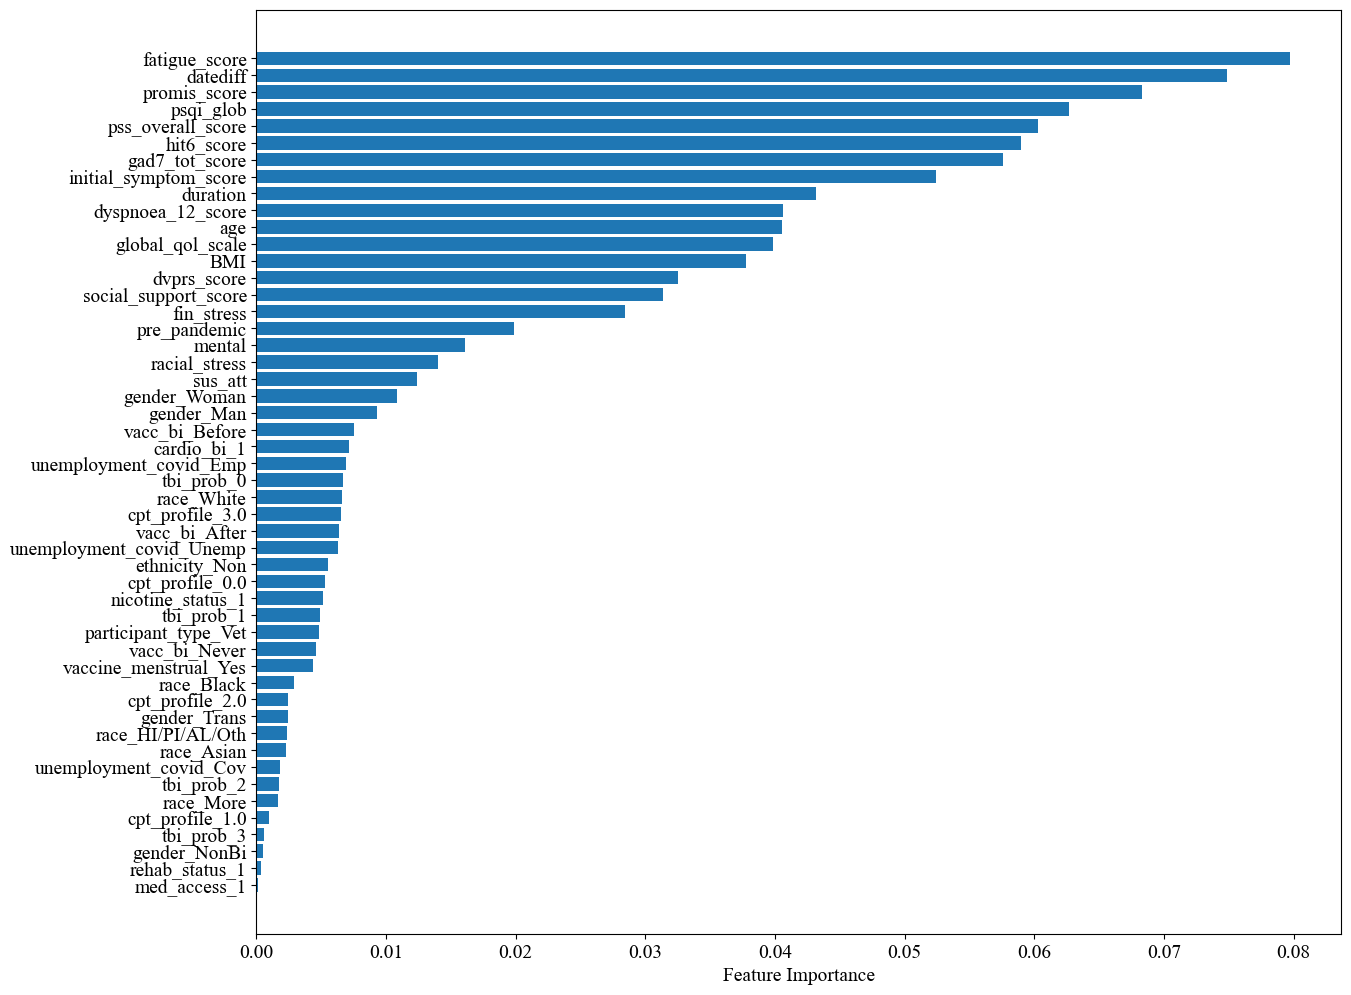

In [411]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(14, 12))
#plt.barh(range(len(feature_names)), importances, align='center')
#plt.yticks(range(len(feature_names)), feature_names)

plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
#plt.show()
plt.savefig('featimp.png')

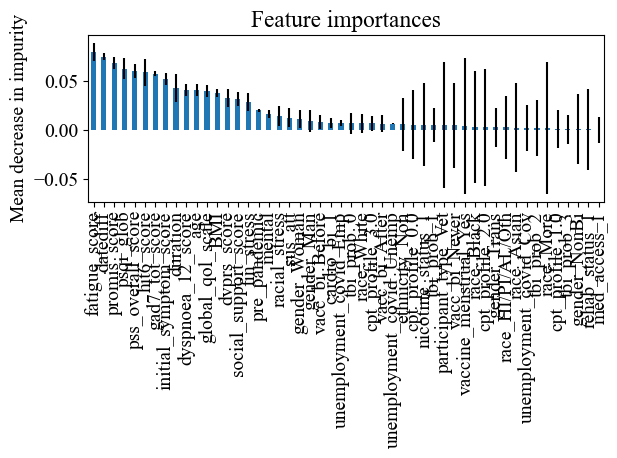

In [412]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



## KNN Classifier

In [413]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 11):
    # Create a K-Nearest Neighbors model with k neighbors and fit it to the balanced training data
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_under, y_train_under.values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'Sens': sensitivity_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_combo)),
        'Acc': accuracy_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_combo)) 
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [414]:
knn_results

,k,Sens,Acc
0,1,0.685393,0.640964
1,2,0.471910,0.749398
2,3,0.730337,0.677108
3,4,0.584270,0.751807
4,5,0.741573,0.715663
5,6,0.674157,0.744578
6,7,0.752809,0.701205
7,8,0.707865,0.730120
8,9,0.764045,0.696386
9,10,0.730337,0.742169


In [415]:
# Create a K-Nearest Neighbors (KNN) classifier with 6 neighbors and fit it to the balanced training data
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_under, y_train_under.values.ravel())

## Boosted Tree

In [416]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [20,21,22,23,24],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 21}

## Single Decision Tree

In [417]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5]
    
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree1_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree1_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree1_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [418]:
tree1 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 4, random_state = 1).fit(X_train_under, y_train_under)

In [419]:
tree1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10461457, 0.01751285, 0.03926162, 0.        , 0.03405887,
       0.00298831, 0.38325671, 0.08919007, 0.        , 0.        ,
       0.        , 0.08943068, 0.        , 0.02456307, 0.        ,
       0.        , 0.        , 0.01369188, 0.20143138, 0.        ])

In [420]:
# Get feature importance scores
importances=tree1.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.3833
datediff: 0.2014
age: 0.1046
dyspnoea_12_score: 0.0894
gad7_tot_score: 0.0892
initial_symptom_score: 0.0393
promis_score: 0.0341
duration: 0.0246
global_qol_scale: 0.0175
fin_stress: 0.0137
hit6_score: 0.0030
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
ethnicity_Non: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
tbi_prob_0: 0.0000
tbi_prob_1: 0.0000
tbi_prob_2: 0.0000
tbi_prob_3: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_Never: 0.0000
cardio_bi_1: 0.0000
med_access_1: 0.0000
pre_pandemic: 0.0000
pss_overall_score: 0.0000
social_s

# Model Performance on Test Set: Confusion Matrix, Accuracy Metrics, ROC Curve Comparison

## Logistic Regression with L2 Penality with 0.5 Cutoff

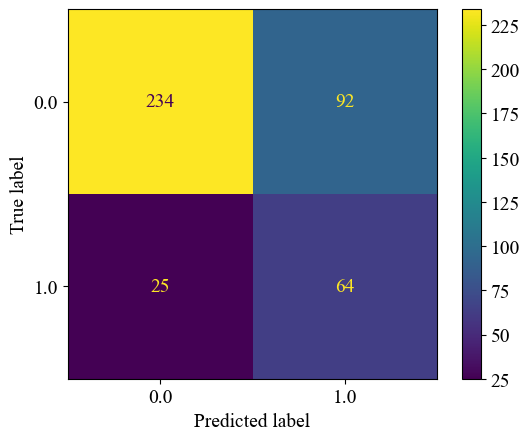

In [421]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [422]:
#Sensitivity, specificity, and accuracy for log reg
logl2_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_f1 = f1_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_prec = precision_score(y_test_imp, log_l2_bal.predict(X_test_log)) 
logl2_rec = recall_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_sens_bal, logl2_spec_bal, logl2_acc_bal, logl2_prec, logl2_rec, logl2_f1

(0.7191011235955056,
 0.7177914110429447,
 0.7180722891566265,
 0.41025641025641024,
 0.7191011235955056,
 0.5224489795918368)

## Logistic Regression with L1 With 0.5 Threshold

In [451]:
# test model significance
# Predict probabilities for the fitted model
y_pred = log_l1_bal.predict_proba(X_test_log)

# Calculate deviance of the fitted model
deviance_fitted = 2 * log_loss(y_test_imp, y_pred, normalize=False)

# Fit the null model (only intercept)
null_model = LogisticRegression(solver='liblinear')
null_model.fit(np.ones((len(y_test_imp), 1)), y_test_imp)

# Predict probabilities for the null model
y_null_pred = null_model.predict_proba(np.ones((len(y_test_imp), 1)))[:, 1]

# Calculate deviance of the null model
deviance_null = 2 * log_loss(y_test_imp, y_null_pred, normalize=False)

# Calculate the difference in deviance
deviance_diff = deviance_null - deviance_fitted

# Degrees of freedom is the number of predictors
df_diff = X_test_log.shape[1]

# Calculate p-value using chi-square distribution
p_value = chi2.sf(deviance_diff, df_diff)

# Print results
print(f"Deviance of Fitted Model: {deviance_fitted}")
print(f"Deviance of Null Model: {deviance_null}")
print(f"Difference in Deviance: {deviance_diff}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value}")

Deviance of Fitted Model: 438.17084233261096
Deviance of Null Model: 431.44273951998264
Difference in Deviance: -6.728102812628322
Degrees of Freedom: 44
P-value: 1.0


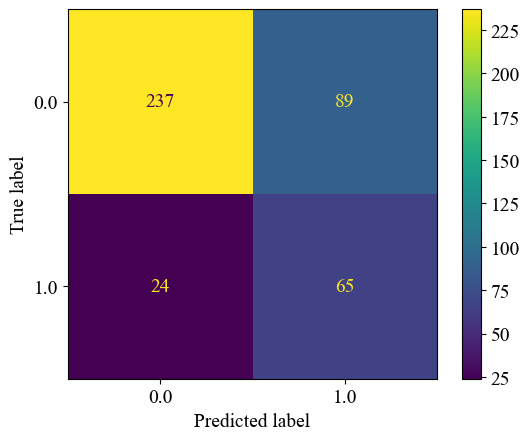

In [426]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l1_bal.predict(X_test_log),
                              labels = log_l1_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('logreg1_cm.png')

In [427]:
#Sensitivity, specificity, and accuracy for log reg
logl1_sens_bal = sensitivity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_spec_bal = specificity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_acc_bal = accuracy_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_prec = precision_score(y_test_imp, log_l1_bal.predict(X_test_log)) 
logl1_rec = recall_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_f1 = f1_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_sens_bal, logl1_spec_bal, logl1_acc_bal, logl1_prec, logl1_rec, logl1_f1

(0.7303370786516854,
 0.7269938650306749,
 0.727710843373494,
 0.42207792207792205,
 0.7303370786516854,
 0.5349794238683128)

## L1 with Alternate Threshold: 0.45

In [ ]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = (log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45).astype(int),
                              labels = log_l1_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [ ]:
#Sensitivity, specificity, and accuracy for log reg
logl1T_sens_bal = sensitivity_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_spec_bal = specificity_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_acc_bal = accuracy_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[: , 1] >= 0.45)
logl1T_f1 = f1_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_sens_bal, logl1T_spec_bal, logl1T_acc_bal, logl1T_f1

# K-Nearest Neighbors Model Evaluation

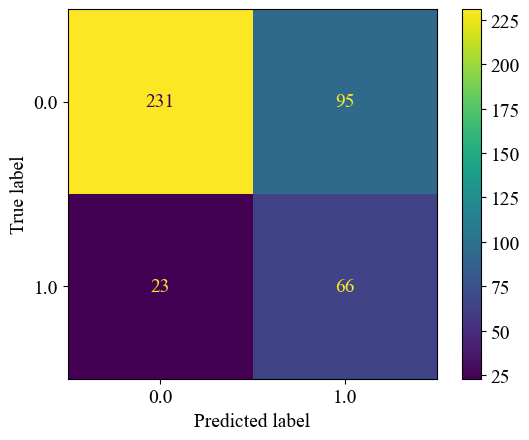

In [453]:
#KNN
# Compute the confusion matrix for KNN 
knn_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = knn.predict(X_test_combo), labels = knn.classes_)
# Create a ConfusionMatrixDisplay object for visualization
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()

In [455]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
knn_sens_bal = sensitivity_score(y_test_imp, knn.predict(X_test_combo))
knn_spec_bal = specificity_score(y_test_imp, knn.predict(X_test_combo))
knn_acc_bal = accuracy_score(y_test_imp, knn.predict(X_test_combo))
knn_prec = precision_score(y_test_imp, knn.predict(X_test_combo)) 
knn_rec = recall_score(y_test_imp, knn.predict(X_test_combo))
knn_f1 = f1_score(y_test_imp, knn.predict(X_test_combo))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal, knn_prec, knn_rec, knn_f1

(0.7415730337078652,
 0.7085889570552147,
 0.7156626506024096,
 0.40993788819875776,
 0.7415730337078652,
 0.528)

## Boosted Decision Tree

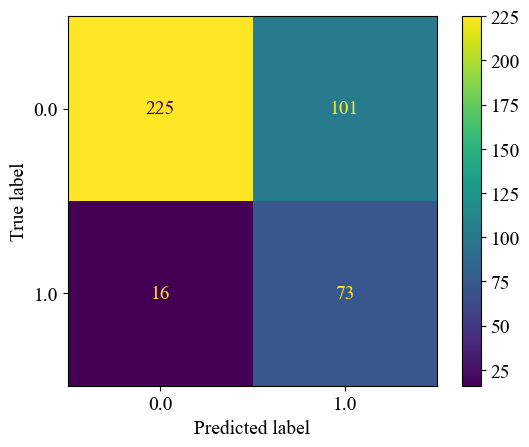

In [442]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree_search.predict(X_test_combo), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [444]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_test_imp, tree_search.predict(X_test_combo))
tree_spec_bal = specificity_score(y_test_imp, tree_search.predict(X_test_combo))
tree_acc_bal = accuracy_score(y_test_imp, tree_search.predict(X_test_combo))
tree_prec = precision_score(y_test_imp, tree_search.predict(X_test_combo)) 
tree_rec = recall_score(y_test_imp, tree_search.predict(X_test_combo))
tree_f1 = f1_score(y_test_imp, tree_search.predict(X_test_combo))
tree_sens_bal, tree_spec_bal, tree_acc_bal, tree_prec, tree_rec, tree_f1

(0.8202247191011236,
 0.6901840490797546,
 0.7180722891566265,
 0.41954022988505746,
 0.8202247191011236,
 0.5551330798479087)

## Single Decision Tree

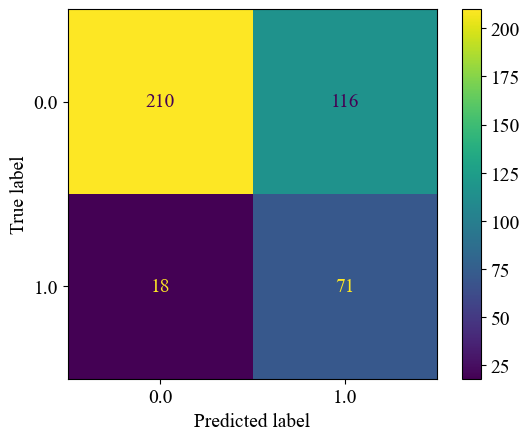

In [445]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree1.predict(X_test_combo), labels = tree1.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree1.classes_)
tree_disp_bal.plot()
plt.show() 

In [446]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree1_sens_bal = sensitivity_score(y_test_imp, tree1.predict(X_test_combo))
tree1_spec_bal = specificity_score(y_test_imp, tree1.predict(X_test_combo))
tree1_acc_bal = accuracy_score(y_test_imp, tree1.predict(X_test_combo))
tree1_prec = precision_score(y_test_imp, tree1.predict(X_test_combo)) 
tree1_rec = recall_score(y_test_imp, tree1.predict(X_test_combo))
tree1_f1 = f1_score(y_test_imp, tree1.predict(X_test_combo))
tree1_sens_bal, tree1_spec_bal, tree1_acc_bal, tree1_prec, tree1_rec, tree1_f1

(0.797752808988764,
 0.6441717791411042,
 0.6771084337349398,
 0.37967914438502676,
 0.797752808988764,
 0.5144927536231884)

In [ ]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree1, feature_names = X_train_under.columns, filled = True, precision = 2, fontsize = 9)
plt.show()

## Random Forest Performance

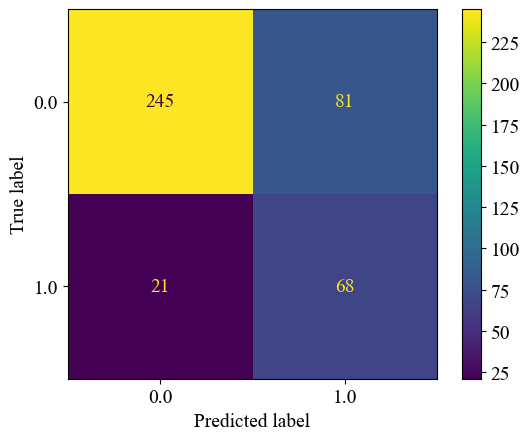

In [447]:
#RF
# Compute the confusion matrix for RF 
rf_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = random_forest.predict(X_test_combo), labels = random_forest.classes_)
# Create a ConfusionMatrixDisplay object for visualization
rf_disp_bal = ConfusionMatrixDisplay(confusion_matrix= rf_cm_bal, display_labels=random_forest.classes_)
rf_disp_bal.plot()
warnings.filterwarnings('ignore')
#plt.show()
plt.savefig('rf_cm.png')

In [449]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced datar
rf_sens_bal = sensitivity_score(y_test_imp, random_forest.predict(X_test_combo))
rf_spec_bal = specificity_score(y_test_imp, random_forest.predict(X_test_combo))
rf_acc_bal = accuracy_score(y_test_imp, random_forest.predict(X_test_combo))
rf_prec = precision_score(y_test_imp, random_forest.predict(X_test_combo)) 
rf_rec = recall_score(y_test_imp, random_forest.predict(X_test_combo))
rf_f1 = f1_score(y_test_imp, random_forest.predict(X_test_combo))
warnings.filterwarnings('ignore')
rf_sens_bal, rf_spec_bal, rf_acc_bal, rf_prec, rf_rec, rf_f1

(0.7640449438202247,
 0.7515337423312883,
 0.7542168674698795,
 0.4563758389261745,
 0.7640449438202247,
 0.5714285714285714)

# Classification Test Set Performance Metrics Table

In [456]:
# Create a table to display performance metrics for different models on the validation dataset

val_performance = [
{'Model': 'Logistic Regression L2', 'Test Sensitivity': logl2_sens_bal, 'Test Specificity':logl2_spec_bal, 
 'Accuracy': logl2_acc_bal, 'Test Precision': logl2_prec, 'Test Recall': logl2_rec, 'F1 Score': logl2_f1},
    {'Model': 'Logistic Regression L1', 'Test Sensitivity': logl1_sens_bal, 'Test Specificity':logl1_spec_bal, 
 'Accuracy': logl1_acc_bal, 'Test Precision': logl1_prec, 'Test Recall': logl1_rec,  'F1 Score': logl1_f1},
    {'Model': 'Boosted Tree', 'Test Sensitivity': tree_sens_bal, 'Test Specificity':tree_spec_bal, 
 'Accuracy': tree_acc_bal, 'Test Precision': tree_prec, 'Test Recall': tree_rec,  'F1 Score': tree_f1},
    {'Model': 'Single Tree', 'Test Sensitivity': tree1_sens_bal, 'Test Specificity':tree1_spec_bal, 
 'Accuracy': tree1_acc_bal, 'Test Precision': tree1_prec, 'Test Recall': tree1_rec, 'F1 Score': tree1_f1},
    {'Model': 'Random Forest', 'Test Sensitivity': rf_sens_bal, 'Test Specificity':rf_spec_bal, 
 'Accuracy': rf_acc_bal, 'Test Precision': rf_prec, 'Test Recall': rf_rec, 'F1 Score': rf_f1},
    {'Model': 'K-Nearest Neighbors', 'Test Sensitivity': knn_sens_bal, 'Test Specificity':knn_spec_bal, 
 'Accuracy': knn_acc_bal, 'Test Precision': knn_prec, 'Test Recall': knn_rec,  'F1 Score': knn_f1},
    
]
# Create a formatted table using tabulate and specify the format as 'fancy_grid'
table = tabulate(val_performance, headers='keys', tablefmt='fancy_grid')
# Display the comparison table
print(table)

╒════════════════════════╤════════════════════╤════════════════════╤════════════╤══════════════════╤═══════════════╤════════════╕
│ Model                  │   Test Sensitivity │   Test Specificity │   Accuracy │   Test Precision │   Test Recall │   F1 Score │
╞════════════════════════╪════════════════════╪════════════════════╪════════════╪══════════════════╪═══════════════╪════════════╡
│ Logistic Regression L2 │           0.719101 │           0.717791 │   0.718072 │         0.410256 │      0.719101 │   0.522449 │
├────────────────────────┼────────────────────┼────────────────────┼────────────┼──────────────────┼───────────────┼────────────┤
│ Logistic Regression L1 │           0.730337 │           0.726994 │   0.727711 │         0.422078 │      0.730337 │   0.534979 │
├────────────────────────┼────────────────────┼────────────────────┼────────────┼──────────────────┼───────────────┼────────────┤
│ Boosted Tree           │           0.820225 │           0.690184 │   0.718072 │         

## ROC Curve Comparison

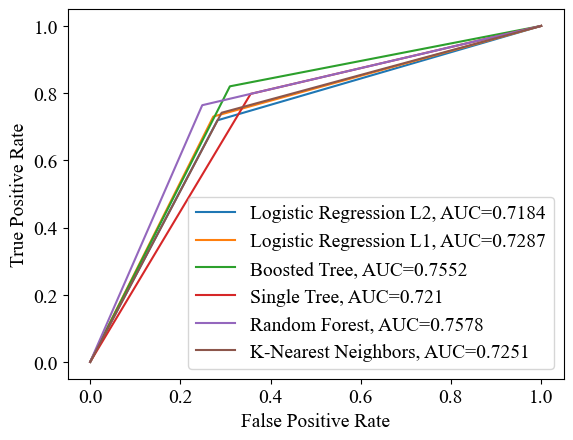

In [457]:
#ROC curve for logistic regression L2
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l2_bal.predict(X_test_log))
auc_log2 = round(roc_auc_score(y_test_imp, log_l2_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L2, AUC="+str(auc_log2))

#ROC Curve for logistic regression L1
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l1_bal.predict(X_test_log))
auc_log1 = round(roc_auc_score(y_test_imp, log_l1_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L1, AUC="+str(auc_log1))

#ROC for Boosted Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree_search.predict(X_test_combo))
auc_tree = round(roc_auc_score(y_test_imp, tree_search.predict(X_test_combo)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc_tree))

#ROC for Single Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree1.predict(X_test_combo))
auc_tree1 = round(roc_auc_score(y_test_imp, tree1.predict(X_test_combo)), 4)
plt.plot(fpr,tpr,label="Single Tree, AUC="+str(auc_tree1))

#ROC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test_imp, random_forest.predict(X_test_combo))
auc_rf = round(roc_auc_score(y_test_imp, random_forest.predict(X_test_combo)), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rf))

#ROC for KNN
fpr, tpr, thresholds = roc_curve(y_test_imp, knn.predict(X_test_combo))
auc_knn = round(roc_auc_score(y_test_imp, knn.predict(X_test_combo)), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc_knn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
#plt.title('Model ROC Curves for Test Data')
plt.legend()
plt.savefig('ROCs.png')

# Lift Curve for Top Models

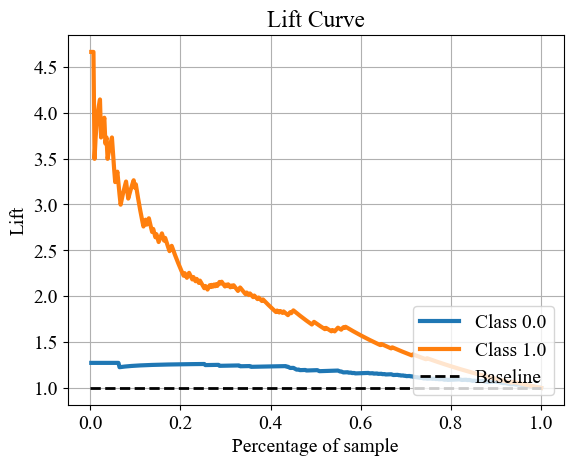

In [612]:
#Lift curve for logistic regression on test data
plot_lift_curve(y_test_imp, log_l1_bal.predict_proba(X_test_log))
plt.savefig('LogLift.png')

## Variance Inflation for Classification Features: Affects Interpretability - All are OK

In [460]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_test_combo.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_test_combo.values, i) 
                          for i in range(len(X_test_combo.columns))] 
  
print(vif_data)

                     feature       VIF
0            cpt_profile_0.0       inf
1            cpt_profile_1.0       inf
2            cpt_profile_2.0       inf
3            cpt_profile_3.0       inf
4       participant_type_Vet  1.379354
5                 gender_Man       inf
6               gender_NonBi       inf
7               gender_Trans       inf
8               gender_Woman       inf
9                 race_Asian       inf
10                race_Black       inf
11         race_HI/PI/AL/Oth       inf
12                 race_More       inf
13                race_White       inf
14             ethnicity_Non  1.306902
15         nicotine_status_1  1.278075
16            rehab_status_1  1.192907
17    unemployment_covid_Cov       inf
18    unemployment_covid_Emp       inf
19  unemployment_covid_Unemp       inf
20     vaccine_menstrual_Yes  1.273597
21                tbi_prob_0       inf
22                tbi_prob_1       inf
23                tbi_prob_2       inf
24                tbi_pro

# Explanatory Model Training: Veteran Civilian Matched Sample

## Using full matched sample for training, and maximizing training accuracy with 10-fold CV. 

### Create input and output variables

In [461]:
ex_cats = ['cpt_profile', 'participant_type',
        'gender', 'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 
        'unemployment_covid', 'vaccine_menstrual',
        'tbi_prob', 'vacc_bi', 'cardio_bi',
        'med_access']
ex_nums = ['sus_att',
           'global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        'racial_stress', 
        'fin_stress',
          'datediff'] 
ex_all_vars = ex_cats+ex_nums

In [462]:
# Split the data into features (X) and the binary target variable (y).
X_ex = pcs_m[ex_all_vars]

#Make outcome variable into binary variable
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y_ex = pcs_m[['pcs_diag']]

## Impute any missing values

In [463]:
X_ex_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_ex), 
                           columns = X_ex.columns.to_list())

In [464]:
y_ex_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_ex), 
                           columns = y_ex.columns.to_list())

## Update datatypes

In [465]:
#update data types
X_ex_imp['gender'] = X_ex_imp['gender'].astype('category')
X_ex_imp['race'] = X_ex_imp['race'].astype('category')
X_ex_imp['ethnicity'] = X_ex_imp['ethnicity'].astype('category')
X_ex_imp['unemployment_covid'] = X_ex_imp['unemployment_covid'].astype('category')
X_ex_imp['tbi_prob'] = X_ex_imp['tbi_prob'].astype('category')
X_ex_imp['vacc_bi'] = X_ex_imp['vacc_bi'].astype('category')
X_ex_imp['nicotine_status'] = X_ex_imp['nicotine_status'].astype('category')
X_ex_imp['rehab_status'] = X_ex_imp['rehab_status'].astype('category')
X_ex_imp['cardio_bi'] = X_ex_imp['cardio_bi'].astype('category')
X_ex_imp['cpt_profile'] = X_ex_imp['cpt_profile'].astype('category')
X_ex_imp['participant_type'] = X_ex_imp['participant_type'].astype('category')
X_ex_imp['vaccine_menstrual'] = X_ex_imp['vaccine_menstrual'].astype('category')
X_ex_imp['med_access'] = X_ex_imp['med_access'].astype('category')

X_ex_imp['sus_att'] = X_ex_imp['sus_att'].astype('int64')
X_ex_imp['global_qol_scale'] = X_ex_imp['global_qol_scale'].astype('int64')
X_ex_imp['initial_symptom_score'] = X_ex_imp['initial_symptom_score'].astype('int64')
X_ex_imp['pre_pandemic'] = X_ex_imp['pre_pandemic'].astype('int64')
X_ex_imp['promis_score'] = X_ex_imp['promis_score'].astype('int64')
X_ex_imp['hit6_score'] = X_ex_imp['hit6_score'].astype('int64')
X_ex_imp['fatigue_score'] = X_ex_imp['fatigue_score'].astype('int64')
X_ex_imp['gad7_tot_score'] = X_ex_imp['gad7_tot_score'].astype('int64')
X_ex_imp['phq9_total'] = X_ex_imp['phq9_total'].astype('int64')
X_ex_imp['pss_overall_score'] = X_ex_imp['pss_overall_score'].astype('int64')
X_ex_imp['social_support_score'] = X_ex_imp['social_support_score'].astype('int64')
X_ex_imp['dvprs_score'] = X_ex_imp['dvprs_score'].astype('int64')
X_ex_imp['dyspnoea_12_score'] = X_ex_imp['dyspnoea_12_score'].astype('int64')
X_ex_imp['BMI'] = X_ex_imp['BMI'].astype('int64')
X_ex_imp['duration'] = X_ex_imp['duration'].astype('int64')
X_ex_imp['psqi_glob'] = X_ex_imp['psqi_glob'].astype('int64')
X_ex_imp['mental'] = X_ex_imp['mental'].astype('int64')
X_ex_imp['racial_stress'] = X_ex_imp['racial_stress'].astype('int64')
X_ex_imp['fin_stress'] = X_ex_imp['fin_stress'].astype('int64')
X_ex_imp['sus_att'] = X_ex_imp['sus_att'].astype('int64')
X_ex_imp['datediff'] = X_ex_imp['datediff'].astype('int64')

## Create transformation pipeline

In [466]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
ex_cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
ex_num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
ex_all_pipe = make_pipeline(ColumnTransformer([('cat', ex_cat_pipe, ex_cats), 
                                            ('num', ex_num_pipe, ex_nums)],
                                          verbose_feature_names_out=False))
# Verify steps
ex_all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'tbi_prob', 'vacc_bi',
                                   'cardio_bi', 'med_access']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['sus_att', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
                                   'promis_score', 'hit6_score', 'fatigue_score',
        

## Fit data through pipeline

In [467]:
#Fit pipeline to resampled data
X_ex_fit = ex_all_pipe.fit(X_ex_imp)
#Get feature names out from fit and create as new list
X_ex_cols = X_ex_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_ex_pipe = pd.DataFrame(ex_all_pipe.fit_transform(X_ex_imp), columns = X_ex_cols)

## Create separate dataset for logistic regression with c-1 dummies removed

In [469]:
X_ex_log = X_ex_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_0', 'vacc_bi_Never'], axis = 1)

## Train L2 logistic regression and examine CV values

In [470]:
# Create Logistic Regression model with L2 regularization
log_l2_ex = LogisticRegressionCV(solver = 'lbfgs', cv = 10, random_state = 1)
# Fit the model to the training data
log_l2_ex.fit(X_ex_log, y_ex_imp.values.ravel())

LogisticRegressionCV(cv=10, random_state=1)

In [471]:
print(cross_val_score(log_l2_ex, X_ex_log, y_ex_imp, cv = 10))

[0.6        0.73333333 0.7        0.76666667 0.7        0.63333333
 0.76666667 0.8        0.75862069 0.79310345]


### Look at log-odds contribution of each feature

In [472]:
d = {'Feature': pd.Series(X_ex_log.columns), 'LogOdds': pd.Series(log_l2_ex.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
43,datediff,0.394059
30,fatigue_score,0.251964
28,promis_score,0.247377
37,BMI,0.223808
36,dyspnoea_12_score,0.207709
31,gad7_tot_score,0.203387
35,dvprs_score,0.196335
29,hit6_score,0.176551
20,vacc_bi_After,0.172231
26,initial_symptom_score,0.168229


## Train L1 logistic regression and examine CV values

In [473]:
# Create Logistic Regression model with L2 regularization
log_l1_ex = LogisticRegressionCV(solver = 'saga', penalty = 'l1', cv = 10, random_state = 1)
# Fit the model to the training data
log_l1_ex.fit(X_ex_log, y_ex_imp.values.ravel())

LogisticRegressionCV(cv=10, penalty='l1', random_state=1, solver='saga')

In [474]:
print(cross_val_score(log_l1_ex, X_ex_log, y_ex_imp, cv = 10))

[0.56666667 0.7        0.8        0.76666667 0.73333333 0.8
 0.8        0.8        0.65517241 0.82758621]


## Examine Log Odds contributions of each feature

In [475]:
d = {'Feature': pd.Series(X_ex_log.columns), 'LogOdds': pd.Series(log_l1_ex.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
43,datediff,0.606485
30,fatigue_score,0.413443
28,promis_score,0.340962
31,gad7_tot_score,0.280380
37,BMI,0.280002
12,nicotine_status_1,0.268368
32,phq9_total,-0.254764
36,dyspnoea_12_score,0.227290
35,dvprs_score,0.194583
26,initial_symptom_score,0.172142


(0.7017543859649122,
 0.8532608695652174,
 0.7953020134228188,
 0.7239819004524887)

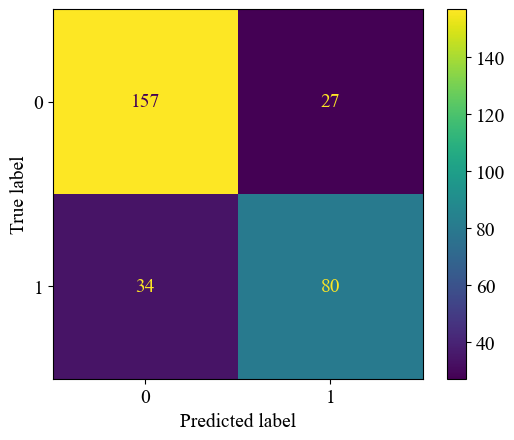

In [476]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_ex_imp, y_pred = log_l1_ex.predict(X_ex_log),
                              labels = log_l1_ex.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_ex.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

#Sensitivity, specificity, and accuracy for log reg
logl1_sens_bal = sensitivity_score(y_ex_imp, log_l1_ex.predict(X_ex_log))
logl1_spec_bal = specificity_score(y_ex_imp, log_l1_ex.predict(X_ex_log))
logl1_acc_bal = accuracy_score(y_ex_imp, log_l1_ex.predict(X_ex_log))
logl1_f1 = f1_score(y_ex_imp, log_l1_ex.predict(X_ex_log))
logl1_sens_bal, logl1_spec_bal, logl1_acc_bal, logl1_f1

## Single Decision Tree

In [477]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5]
    
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_ex_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_ex_search.fit(X_ex_pipe, y_ex_imp.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_ex_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [478]:
tree_ex = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, random_state = 1).fit(X_ex_pipe, y_ex_imp)

In [479]:
tree_ex.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0324971 , 0.        , 0.09639303, 0.        , 0.        ,
       0.02031069, 0.39078181, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15392526, 0.03096029, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27513182])

In [480]:
# Get feature importance scores
importances=tree_ex.feature_importances_
feature_importance_pairs=list(zip(X_ex_pipe.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.3908
datediff: 0.2751
dyspnoea_12_score: 0.1539
initial_symptom_score: 0.0964
sus_att: 0.0325
BMI: 0.0310
hit6_score: 0.0203
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
ethnicity_Non: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
tbi_prob_0: 0.0000
tbi_prob_1: 0.0000
tbi_prob_2: 0.0000
tbi_prob_3: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_Never: 0.0000
cardio_bi_1: 0.0000
med_access_1: 0.0000
global_qol_scale: 0.0000
pre_pandemic: 0.0000
promis_score: 0.0000
gad7_tot_score: 0.0000
phq9_total: 0.0000
pss_overall_score: 0.0000
social_su

(0.6666666666666666,
 0.8913043478260869,
 0.8053691275167785,
 0.7238095238095238)

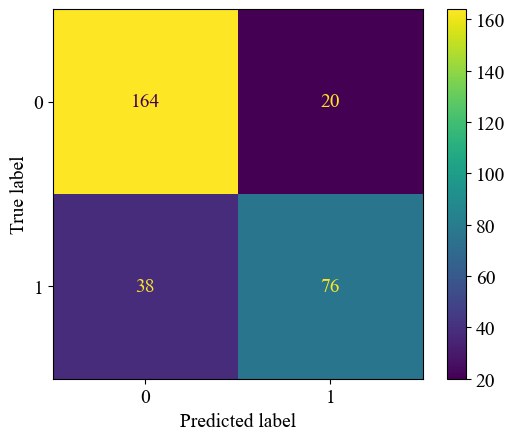

In [481]:
#Logistic Regression
tree_cm_bal = confusion_matrix(y_true = y_ex_imp, y_pred = tree_ex.predict(X_ex_pipe),
                              labels = tree_ex.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_ex.classes_)
tree_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

#Sensitivity, specificity, and accuracy for log reg
treel1_sens_bal = sensitivity_score(y_ex_imp, tree_ex.predict(X_ex_pipe))
treel1_spec_bal = specificity_score(y_ex_imp, tree_ex.predict(X_ex_pipe))
treel1_acc_bal = accuracy_score(y_ex_imp, tree_ex.predict(X_ex_pipe))
treel1_f1 = f1_score(y_ex_imp, tree_ex.predict(X_ex_pipe))
treel1_sens_bal, treel1_spec_bal, treel1_acc_bal, treel1_f1

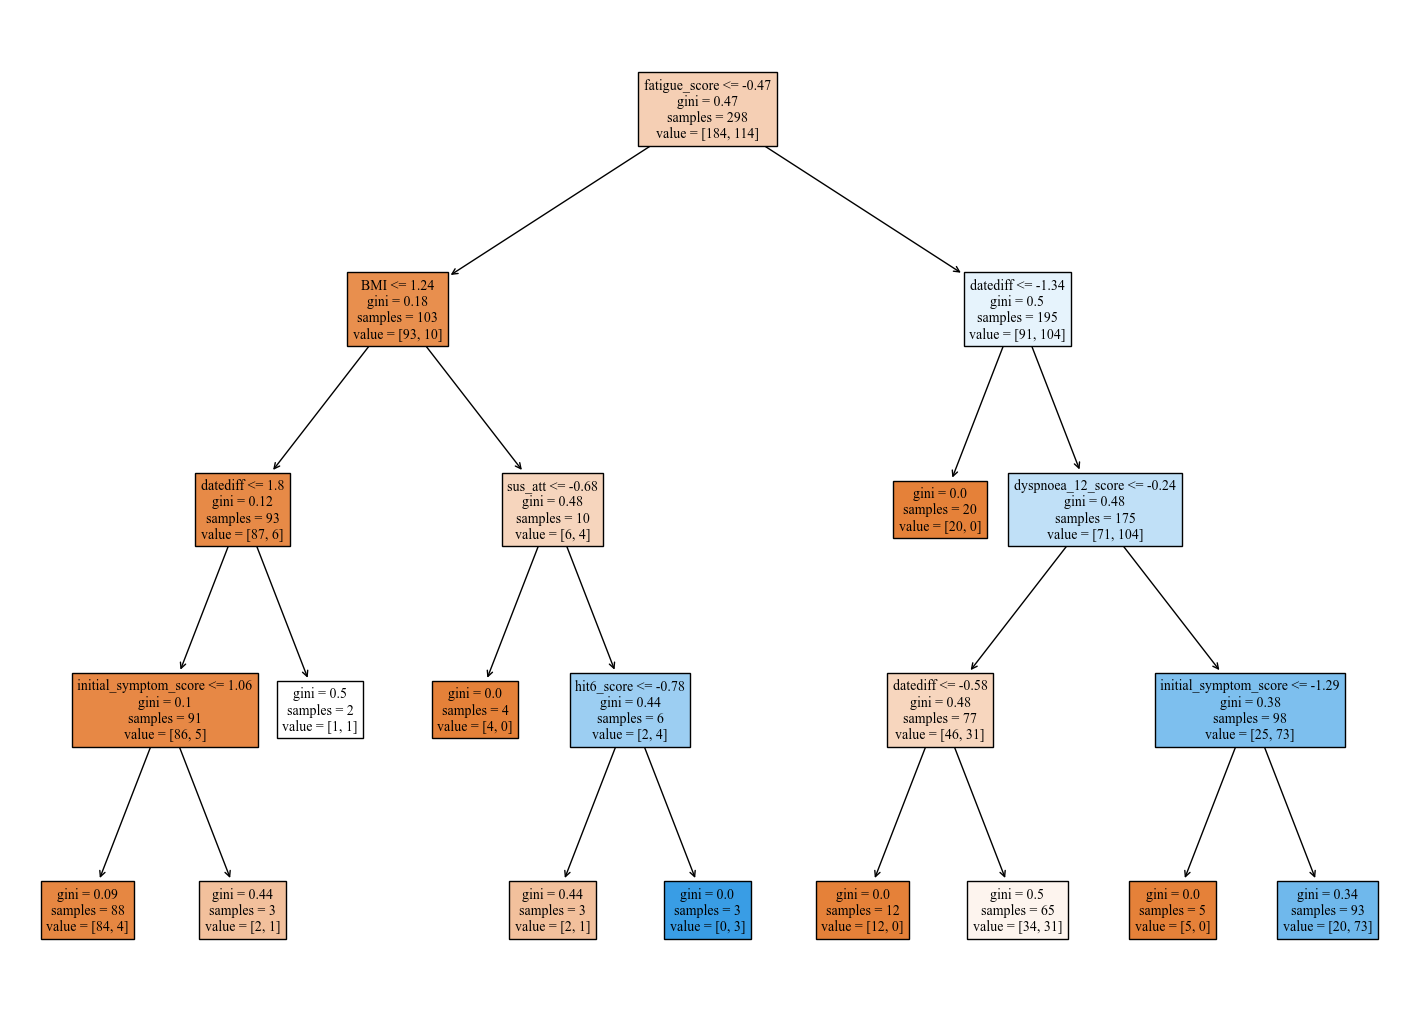

In [482]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree_ex, feature_names = X_ex_pipe.columns, filled = True, precision = 2, fontsize = 10)
#plt.show()
plt.savefig('DecisionTree.png')

In [483]:
print(cross_val_score(tree_ex, X_ex_pipe, y_ex_imp, cv = 10))

[0.63333333 0.76666667 0.83333333 0.8        0.83333333 0.7
 0.76666667 0.6        0.65517241 0.62068966]


# Cognitive Model - Predicting Brain Fog - Regression

In [484]:
pcs_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   sex                    793 non-null    object 
 3   gender                 793 non-null    object 
 4   race                   793 non-null    object 
 5   ethnicity              793 non-null    object 
 6   racial_stress          793 non-null    int64  
 7   nicotine_status        793 non-null    int64  
 8   rehab_status           793 non-null    int64  
 9   unemployment_covid     793 non-null    object 
 10  global_qol_scale       793 non-null    int64  
 11  vaccine_menstrual      793 non-null    object 
 12  med_access             793 non-null    int64  
 13  initial_symptom_score  793 non-null    int64  
 14  pre_pandemic           793 non-null    int64  
 15  hit6_s

# Update Datatypes

## Define input and output features

In [485]:
cog_cats = ['pcs_diag', 'cluster', 'vacc_bi','tbi_prob', 'participant_type', 'gender',
           'race', 'nicotine_status', 'rehab_status', 'unemployment_covid', 'vaccine_menstrual',
           'med_access', 'cpt_profile']

cog_nums = ['fin_stress', 'mental', 'duration', 'age', 'racial_stress', 'global_qol_scale',
            'initial_symptom_score', 'pre_pandemic', 'pss_overall_score', 'social_support_score',
            'dvprs_score', 'BMI', 'sus_att', 'datediff', 
            'vs_a_rt_mn_l', 
            'f_c_rt_mn', 
            'ds_acc', 'read_rt_sum', 'type_rt_sum', 
            'co', 'hrt_s',
            'rat_e_rt_mn']

cog_all = cog_cats+cog_nums

In [486]:
#cog_cats = ['pcs_diag', 'cluster']

#cog_nums = ['fin_stress', 'mental', 'racial_stress', 'global_qol_scale',
            #'pss_overall_score', 'social_support_score',
            #'dvprs_score', 'sus_att', 'hit6_score', 
            #'vs_a_rt_mn_l',  
            #'co', 'hrt_s',
            #'rat_e_rt_mn']
#cog_all = cog_cats+cog_nums

## Split data into training and test sets

In [487]:
# Split the data into features (X) and the binary target variable (y).
X_cog = pcs_c[cog_all]

#Define outcome variable
y_cog = pcs_c[['promis_score']]

#Split data
X_cog_train, X_cog_test, y_cog_train, y_cog_test = train_test_split(X_cog, y_cog, train_size = 0.7, random_state=1)

## Use median/mode to impute any missing values. 

In [488]:
X_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_train), 
                           columns = X_cog_train.columns.to_list())
y_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_train), 
                           columns = y_cog_train.columns.to_list())
X_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_test), 
                           columns = X_cog_test.columns.to_list())
y_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_test), 
                           columns = y_cog_test.columns.to_list())

## Run training and test set through the transformation pipeline

In [489]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cog_cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
cog_num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
cog_all_pipe = make_pipeline(ColumnTransformer([('cat', cog_cat_pipe, cog_cats), 
                                            ('num', cog_num_pipe, cog_nums)],
                                          verbose_feature_names_out=False))
# Verify steps
cog_all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['pcs_diag', 'cluster', 'vacc_bi', 'tbi_prob',
                                   'participant_type', 'gender', 'race',
                                   'nicotine_status', 'rehab_status',
                                   'unemployment_covid', 'vaccine_menstrual',
                                   'med_access', 'cpt_profile']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['fin_stress', 'mental', 'duration', 'age',
                                   'racial_stress', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
         

### Training

In [490]:
#Fit pipeline to resampled data
X_cog_train_fit = cog_all_pipe.fit(X_cog_train_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_train_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_train_imp), columns = X_cog_cols)

### Testing

In [491]:
#Fit pipeline to resampled data
X_cog_test_fit = cog_all_pipe.fit(X_cog_test_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_test_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_test_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_test_imp), columns = X_cog_cols)

## Create datasets with c-1 dummies for linear models

In [492]:
X_cog_train_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pcs_diag_PASC             555 non-null    float64
 1   cluster_1                 555 non-null    float64
 2   cluster_2                 555 non-null    float64
 3   cluster_3                 555 non-null    float64
 4   cluster_4                 555 non-null    float64
 5   cluster_5                 555 non-null    float64
 6   cluster_6                 555 non-null    float64
 7   vacc_bi_After             555 non-null    float64
 8   vacc_bi_Before            555 non-null    float64
 9   vacc_bi_Never             555 non-null    float64
 10  tbi_prob_0                555 non-null    float64
 11  tbi_prob_1                555 non-null    float64
 12  tbi_prob_2                555 non-null    float64
 13  tbi_prob_3                555 non-null    float64
 14  participan

In [494]:
X_cog_train_l = X_cog_train_pipe.drop(['cluster_4', 'vacc_bi_Never', 'tbi_prob_0', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp', 'cpt_profile_0.0'], axis = 1)
X_cog_test_l = X_cog_test_pipe.drop(['cluster_4', 'vacc_bi_Never', 'tbi_prob_0', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp', 'cpt_profile_0.0'], axis = 1)

In [495]:
X_cog_train_l.shape, X_cog_test_l.shape

((555, 50), (238, 50))

In [496]:
X_cog_train_l.describe()

,pcs_diag_PASC,cluster_1,cluster_2,cluster_3,cluster_5,cluster_6,vacc_bi_After,vacc_bi_Before,tbi_prob_1,tbi_prob_2,...,sus_att,datediff,vs_a_rt_mn_l,f_c_rt_mn,ds_acc,read_rt_sum,type_rt_sum,co,hrt_s,rat_e_rt_mn
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02
mean,0.340541,0.019820,0.178378,0.043243,0.140541,0.099099,0.250450,0.581982,0.302703,0.025225,...,3.440691e-16,9.921993e-17,-1.785959e-15,5.958824e-11,-1.280257e-16,-2.294861e-15,2.450092e-15,8.641736e-17,-4.864977e-16,8.353678e-16
std,0.474319,0.139506,0.383176,0.203588,0.347861,0.299065,0.433663,0.493678,0.459842,0.156950,...,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00,1.000902e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.912442e+00,-2.386457e+00,-3.974259e+00,-2.968693e+00,-2.434651e+00,-3.644548e+00,-3.165213e+00,-2.497221e+00,-1.314827e+00,-4.262194e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.266139e-01,-7.145690e-01,-6.291372e-01,-6.533826e-01,-5.081164e-01,-6.772063e-01,-7.933216e-01,-6.994273e-01,-1.314827e+00,-6.294980e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.266139e-01,-2.728520e-02,-1.090480e-02,1.291602e-02,7.655958e-02,-8.527987e-02,-1.524304e-01,-1.046133e-01,1.541003e-01,-8.127101e-02
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000,...,1.266139e-01,7.999442e-01,6.207498e-01,6.074703e-01,7.608246e-01,6.997185e-01,8.981491e-01,8.872137e-01,7.434046e-01,5.645712e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.858284e+00,2.183798e+00,3.194670e+00,2.555080e+00,2.468498e+00,4.867008e+00,2.177778e+00,2.184029e+00,2.850411e+00,3.798405e+00


## Creating a Balanced Training Set: Positive Skew Leads to Less Information about Severe End of Brainfog. This will need to be corrected so the trained model has an equal amount of information about the full range of PROMIS cognitive scores. 

## A log transformation improves skew, but does not improve lack of data for right tail of distribution.

(array([177.,  63.,  61.,  78.,  41.,  61.,  20.,  20.,  17.,  17.]),
 array([ 8. , 11.2, 14.4, 17.6, 20.8, 24. , 27.2, 30.4, 33.6, 36.8, 40. ]),
 <BarContainer object of 10 artists>)

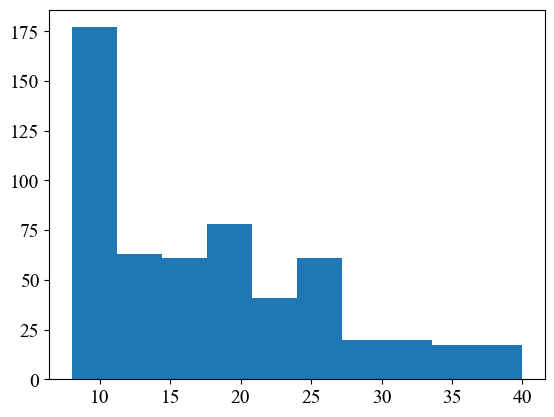

In [497]:
plt.figure()
plt.hist(y_cog_train_imp['promis_score'])

In [498]:
y_cog_train_imp['promis_score'].skew()

0.7050266813061775

(array([135.,  42.,  19.,  65.,  40.,  95.,  48.,  46.,  35.,  30.]),
 array([2.07944154, 2.24038533, 2.40132912, 2.56227292, 2.72321671,
        2.8841605 , 3.04510429, 3.20604808, 3.36699187, 3.52793566,
        3.68887945]),
 <BarContainer object of 10 artists>)

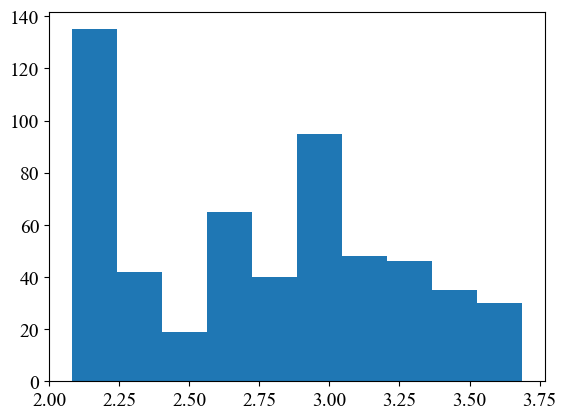

In [499]:
plt.hist(np.log(y_cog_train_imp))

In [500]:
np.log(y_cog_train_imp).skew()

promis_score    0.023154
dtype: float64

## Resampling Methods to Balance Training Data's Continuous Distribution

### If we look at distribution in bins, we can see the lack of power on the positive end.

In [501]:
#bin_indices, bin_freqs = resreg.bin_split(y_cog_train_imp['promis_score'], bins=[10])
#print(bin_freqs)

### Data is limited by scores in severe bin. Balance all bins.

In [502]:
#norm_samp = y_cog_train_imp.loc[y_cog_train_imp['promis_score'] < 10].sample(n=68, random_state = 1)
#norm_samp

In [503]:
#ext_samp = y_cog_train_imp[y_cog_train_imp['promis_score'] > 9]
#ext_samp.shape

## Combine the balanced bins into one dataset

In [504]:
#y_cog_train_bal = pd.concat([norm_samp, ext_samp], join="inner")
#y_cog_train_bal

In [505]:
#plt.hist(y_cog_train_bal['promis_score'])

In [506]:
#y_cog_train_bal['promis_score'].skew()

In [507]:
#np.log(y_cog_train_bal['promis_score']).skew()

## Use index from balanced outcome variable to trim dataframe of input features

In [508]:
#trim_index = norm_samp.index
#trim_index

In [509]:
#X_cog_train_trim = X_cog_train_l.loc[X_cog_train_l.index[trim_index]]
#X_cog_train_trim.shape

In [510]:
#X_cog_train_trim

## Joined Trimmed with Scores Greater than or Equal to 10

In [511]:
#tail_index = ext_samp.index
#tail_index

In [512]:
#X_cog_train_tail = X_cog_train_l.loc[X_cog_train_l.index[tail_index]]
#X_cog_train_tail.shape

In [513]:
#X_cog_train_tail.head()

In [514]:
#X_cog_train_bal = pd.concat([X_cog_train_trim, X_cog_train_tail], join="inner")
#X_cog_train_bal

## Add any discarded data back to testing set.

In [515]:
#X_cog_test_extra = X_cog_train_l.loc[X_cog_train_l.index[~trim_index]]
#X_cog_test_extra.head()

In [516]:
#X_cog_test_combo = pd.concat([X_cog_test_l, X_cog_test_extra], join = 'inner')
#X_cog_test_combo.shape

## Update testing outcome variable to max new index list

In [517]:
#y_cog_test_extra = y_cog_train_imp.loc[y_cog_train_imp.index[~trim_index]]
#y_cog_test_extra.head(), y_cog_test_extra.shape

In [518]:
#y_cog_test_combo = pd.concat([y_cog_test_imp, y_cog_test_extra], join = 'inner')
#y_cog_test_combo.shape

## Redefine Input and Output Variables

In [519]:
#X_cog_train_l = X_cog_train_bal
#y_cog_train_imp = y_cog_train_bal

#X_cog_test_l = X_cog_test_combo
#y_cog_test_imp = y_cog_test_combo

array([[<Axes: title={'center': 'pcs_diag_PASC'}>,
        <Axes: title={'center': 'cluster_1'}>,
        <Axes: title={'center': 'cluster_2'}>,
        <Axes: title={'center': 'cluster_3'}>,
        <Axes: title={'center': 'cluster_5'}>,
        <Axes: title={'center': 'cluster_6'}>,
        <Axes: title={'center': 'vacc_bi_After'}>],
       [<Axes: title={'center': 'vacc_bi_Before'}>,
        <Axes: title={'center': 'tbi_prob_1'}>,
        <Axes: title={'center': 'tbi_prob_2'}>,
        <Axes: title={'center': 'tbi_prob_3'}>,
        <Axes: title={'center': 'participant_type_Vet'}>,
        <Axes: title={'center': 'gender_NonBi'}>,
        <Axes: title={'center': 'gender_Trans'}>],
       [<Axes: title={'center': 'gender_Woman'}>,
        <Axes: title={'center': 'race_Asian'}>,
        <Axes: title={'center': 'race_Black'}>,
        <Axes: title={'center': 'race_HI/PI/AL/Oth'}>,
        <Axes: title={'center': 'race_More'}>,
        <Axes: title={'center': 'nicotine_status_1'}>,
    

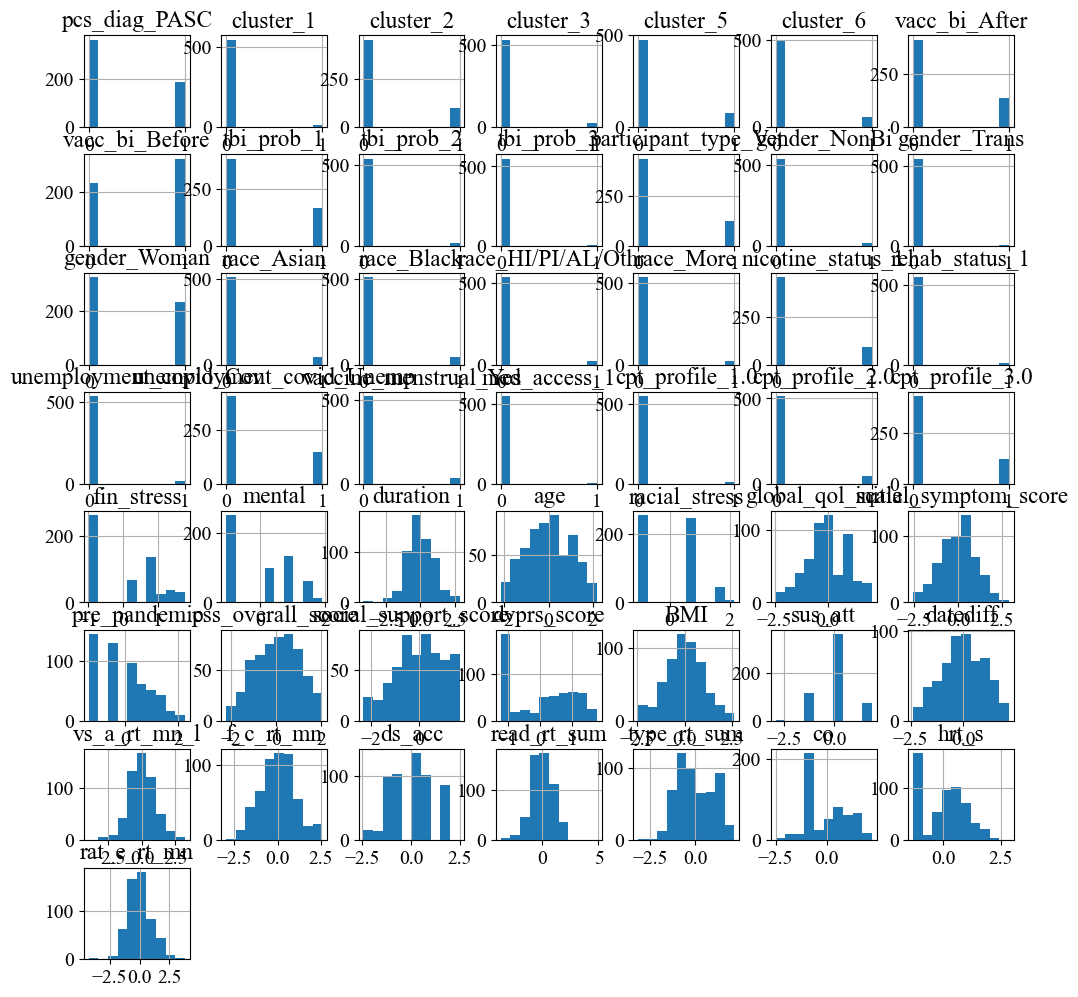

In [520]:
X_cog_train_l.hist(figsize = (12,12))

# Model Training

## Feature Selection with Basic Linear Regression

In [521]:
#Find stepwise regression combination of predictors that make optimal model based on AIC
def train_model(variables):
    if len(variables) == 0:
        return None
    l1_reg = LinearRegression()
    l1_reg.fit(X_cog_train_l, y_cog_train_imp)
    return l1_reg

def score_model(l1_reg, variables):
    if len(variables) == 0:
        return AIC_score(y_cog_train_imp, [y_cog_train_imp.mean()]*len(y_cog_train_imp), l1_reg, df =1)
    return AIC_score(y_cog_train_imp, l1_reg.predict(X_cog_train_l), l1_reg)

best_model, best_variables = stepwise_selection(X_cog_train_l.columns, train_model, score_model, verbose = True)
print(best_variables)


Variables: pcs_diag_PASC, cluster_1, cluster_2, cluster_3, cluster_5, cluster_6, vacc_bi_After, vacc_bi_Before, tbi_prob_1, tbi_prob_2, tbi_prob_3, participant_type_Vet, gender_NonBi, gender_Trans, gender_Woman, race_Asian, race_Black, race_HI/PI/AL/Oth, race_More, nicotine_status_1, rehab_status_1, unemployment_covid_Cov, unemployment_covid_Unemp, vaccine_menstrual_Yes, med_access_1, cpt_profile_1.0, cpt_profile_2.0, cpt_profile_3.0, fin_stress, mental, duration, age, racial_stress, global_qol_scale, initial_symptom_score, pre_pandemic, pss_overall_score, social_support_score, dvprs_score, BMI, sus_att, datediff, vs_a_rt_mn_l, f_c_rt_mn, ds_acc, read_rt_sum, type_rt_sum, co, hrt_s, rat_e_rt_mn
Start: score=3941.80, constant
Step: score=3402.96, add pcs_diag_PASC
Step: score=3402.96, unchanged None
['pcs_diag_PASC']


In [522]:
#Find backward elmination combination of predictors that make optimal model based on AIC
def train_model(variables):
    l1_reg = LinearRegression()
    l1_reg.fit(X_cog_train_l, y_cog_train_imp)
    return l1_reg

def score_model(l1_reg, variables):
    return AIC_score(y_cog_train_imp, l1_reg.predict(X_cog_train_l), l1_reg)

best_model, best_variables = backward_elimination(X_cog_train_l.columns, train_model, score_model, verbose = True)
print(best_variables)

Variables: pcs_diag_PASC, cluster_1, cluster_2, cluster_3, cluster_5, cluster_6, vacc_bi_After, vacc_bi_Before, tbi_prob_1, tbi_prob_2, tbi_prob_3, participant_type_Vet, gender_NonBi, gender_Trans, gender_Woman, race_Asian, race_Black, race_HI/PI/AL/Oth, race_More, nicotine_status_1, rehab_status_1, unemployment_covid_Cov, unemployment_covid_Unemp, vaccine_menstrual_Yes, med_access_1, cpt_profile_1.0, cpt_profile_2.0, cpt_profile_3.0, fin_stress, mental, duration, age, racial_stress, global_qol_scale, initial_symptom_score, pre_pandemic, pss_overall_score, social_support_score, dvprs_score, BMI, sus_att, datediff, vs_a_rt_mn_l, f_c_rt_mn, ds_acc, read_rt_sum, type_rt_sum, co, hrt_s, rat_e_rt_mn
Start: score=3402.96
Step: score=3402.96, remove None
['pcs_diag_PASC', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_5', 'cluster_6', 'vacc_bi_After', 'vacc_bi_Before', 'tbi_prob_1', 'tbi_prob_2', 'tbi_prob_3', 'participant_type_Vet', 'gender_NonBi', 'gender_Trans', 'gender_Woman', 'race_Asia

## PCA Shows 8 Components of Valid Information - Top 8 Predictors should be given most weight in model interpretation

In [523]:
pca = PCA(n_components=8).fit(X_cog_train_l)
pca_df = pd.DataFrame(pca.components_ , columns = X_cog_train_l.columns). transpose()

In [524]:
pca.explained_variance_

array([3.91171268, 3.03748758, 1.78740748, 1.51263435, 1.30616926,
       1.15116786, 1.1126387 , 0.99114162])

In [525]:
pca_df.head(50)

,0,1,2,3,4,5,6,7
pcs_diag_PASC,0.119894,0.012937,0.040436,-0.042505,0.049541,0.012928,0.038073,0.022601
cluster_1,-0.000959,0.003548,-0.005607,0.002735,0.006894,-0.003930,-0.006214,-0.007393
cluster_2,0.065787,0.015411,0.037579,0.011797,-0.000345,-0.018303,0.016330,0.036037
cluster_3,0.002255,-0.003865,-0.009831,0.008924,0.004466,0.007779,0.008744,0.012109
cluster_5,0.003721,-0.007496,0.007049,-0.006335,0.002191,-0.006507,-0.000601,0.002844
cluster_6,0.047175,0.023143,-0.002041,-0.025329,0.020104,0.002780,0.027267,0.001323
vacc_bi_After,0.030386,0.028008,0.080839,-0.159968,0.051803,0.094603,0.015905,-0.082308
vacc_bi_Before,-0.061683,-0.032256,-0.081053,0.199926,-0.055865,-0.088198,0.034399,0.086924
tbi_prob_1,0.029475,0.010496,0.022418,0.023138,-0.012855,0.025155,-0.002555,-0.017859
tbi_prob_2,0.005589,0.004927,-0.003239,-0.004406,0.001661,0.006921,0.005864,-0.000721


In [526]:
pca_df.abs().max()

0    0.391390
1    0.491866
2    0.485468
3    0.511653
4    0.557077
5    0.544517
6    0.558329
7    0.528861
dtype: float64

## Model 1: Simple Linear Regression

In [527]:
# Training metrics
x = sm.add_constant(X_cog_train_l)

#fit linear regression model
lr = sm.OLS(np.log(y_cog_train_imp), x).fit()

#view model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           promis_score   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     17.22
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.47e-80
Time:                        10:32:21   Log-Likelihood:                -109.09
No. Observations:                 555   AIC:                             320.2
Df Residuals:                     504   BIC:                             540.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [528]:
lr = LinearRegression().fit(X_cog_train_l, np.log(y_cog_train_imp))
lr

LinearRegression()

In [529]:
d = {'Feature': pd.Series(X_cog_train_l.columns), 'Coefficient': pd.Series(lr.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['Coefficient'].abs().sort_values(ascending=False).index)
df.head(50)

,Feature,Coefficient
5,cluster_6,0.226522
3,cluster_3,0.218573
36,pss_overall_score,0.201162
2,cluster_2,0.185087
25,cpt_profile_1.0,-0.183646
1,cluster_1,0.124894
7,vacc_bi_Before,0.099375
16,race_Black,-0.095382
10,tbi_prob_3,-0.091191
21,unemployment_covid_Cov,-0.089045


## Model 2: Penalized Linear Regression - Ridge L2 and Lasso L1

### Grid Search for L1 at Different Alphas, for 5-fold, 10-fold, and Leave one out cross-validation

#### 5-Fold

In [530]:
# Define a grid of hyperparameters to search for 
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 1000]}
# Create a GridSearchCV object
l1_5_search = GridSearchCV(Lasso(random_state=1), param_grid, cv = 5, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
l1_5_search.fit(X_cog_train_l, np.log(y_cog_train_imp))

# Get the best hyperparameters found by the GridSearch
l1_5_search.best_params_

{'alpha': 0.01}

In [531]:
cross_val_score(l1_5_search, X_cog_train_l, y_cog_train_imp, cv=5)

array([0.52660959, 0.5909696 , 0.44877159, 0.59360486, 0.56058179])

#### 10-Fold

In [532]:
# Define a grid of hyperparameters to search for 
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 1000]}

# Create a GridSearchCV object
l1_10_search = GridSearchCV(Lasso(random_state=1), param_grid, cv = 10, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
l1_10_search.fit(X_cog_train_l, np.log(y_cog_train_imp))

# Get the best hyperparameters found by the GridSearch
l1_10_search.best_params_

{'alpha': 0.01}

In [533]:
np.round(cross_val_score(l1_10_search, X_cog_train_l, y_cog_train_imp, cv=10),2)

array([0.39, 0.59, 0.69, 0.48, 0.52, 0.37, 0.5 , 0.7 , 0.43, 0.59])

#### Leave One Out

In [534]:
#Define a grid of hyperparameters to search for 
#param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 1000]}
# Create a GridSearchCV object
#l1_1_search = GridSearchCV(Lasso(random_state=1), param_grid, cv = 555, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
#l1_1_search.fit(X_cog_train_l, y_cog_train_imp['cog_log'])

# Get the best hyperparameters found by the GridSearch
#l1_1_search.best_params_

### Lasso L1 Training Model

In [535]:
l1_cv = LassoCV(random_state=1, cv = 10)
l1_cv.fit(X_cog_train_l, np.log(y_cog_train_imp))

LassoCV(cv=10, random_state=1)

In [536]:
l1_cv.alpha_

0.0048072631700272535

In [537]:
l1_cv.intercept_

2.681739425500834

In [538]:
d = {'Feature': pd.Series(X_cog_train_l.columns), 'Coefficient': pd.Series(l1_cv.coef_)}
df = pd.DataFrame(data=d).reindex(d['Coefficient'].abs().sort_values(ascending=False).index)
df.head(50)

,Feature,Coefficient
36,pss_overall_score,0.215131
0,pcs_diag_PASC,0.091510
34,initial_symptom_score,0.070110
38,dvprs_score,0.061363
5,cluster_6,0.047763
32,racial_stress,0.044712
7,vacc_bi_Before,0.041807
3,cluster_3,0.036899
2,cluster_2,0.033734
40,sus_att,0.026625


In [539]:
AIC_score(y_cog_train_imp, np.exp(l1_cv.predict(X_cog_train_l)), l1_cv)

7794.022614212689

### L2 Ridge Regression

### 5 Fold

In [540]:
# Define a grid of hyperparameters to search for 
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 1000]}
# Create a GridSearchCV object
l2_5_search = GridSearchCV(Ridge(random_state=1), param_grid, cv = 5, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
l2_5_search.fit(X_cog_train_l, np.log(y_cog_train_imp))

# Get the best hyperparameters found by the GridSearch
l2_5_search.best_params_

{'alpha': 50}

In [541]:
cross_val_score(l2_5_search, X_cog_train_l, y_cog_train_imp, cv=5)

array([0.52921634, 0.57585794, 0.45280454, 0.58804006, 0.55633026])

### 10 Fold

In [542]:
# Define a grid of hyperparameters to search for 
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 1000]}
# Create a GridSearchCV object
l2_10_search = GridSearchCV(Ridge(random_state=1), param_grid, cv = 10, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
l2_10_search.fit(X_cog_train_l, np.log(y_cog_train_imp))

# Get the best hyperparameters found by the GridSearch
l2_10_search.best_params_

{'alpha': 50}

In [543]:
cross_val_score(l2_10_search, X_cog_train_l, y_cog_train_imp, cv=10)

array([0.4293339 , 0.58502877, 0.69555772, 0.44464397, 0.51518984,
       0.3976759 , 0.47841044, 0.69677269, 0.42604857, 0.58565698])

## Training Model

In [544]:
l2 = Ridge(random_state=1, alpha = 5)
l2.fit(X_cog_train_l, np.log(y_cog_train_imp))

Ridge(alpha=5, random_state=1)

In [545]:
l2_cv = RidgeCV(alphas=(0.1, 1.0, 10.0, 20, 30, 100.0), cv = 10)
l2_cv.fit(X_cog_train_l, np.log(y_cog_train_imp))

RidgeCV(alphas=(0.1, 1.0, 10.0, 20, 30, 100.0), cv=10)

In [546]:
l2_cv.alpha_

30.0

## Model 3: Decision Tree Regressor

In [547]:
# Define a grid of hyperparameters to search for 
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5],
    'criterion' : ['squared_error', 'absolute_error']
    
}
# Create a GridSearchCV object
tree_cog_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_cog_search.fit(X_cog_train_pipe, np.log(y_cog_train_imp).values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_cog_search.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 2}

In [548]:
tree_cog = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2, random_state = 1).fit(X_cog_train_pipe, np.log(y_cog_train_imp))


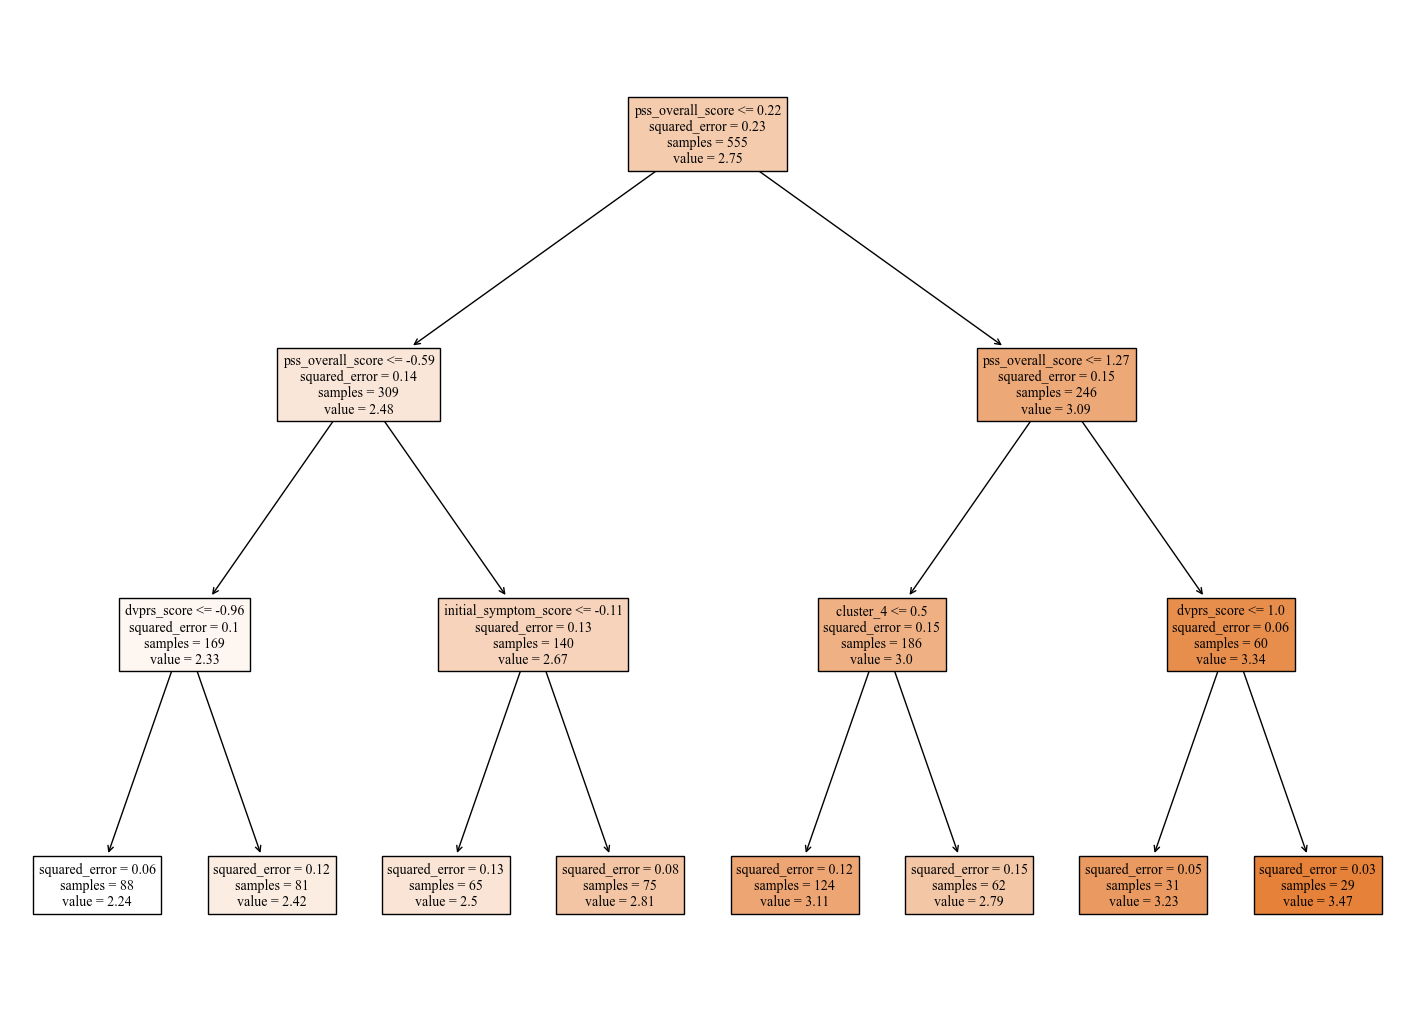

In [549]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree_cog, feature_names = X_cog_train_pipe.columns, filled = True, precision = 2, fontsize = 10)
plt.show()

In [550]:
# Get feature importance scores
importances=tree_cog.feature_importances_
feature_importance_pairs=list(zip(X_cog_train_pipe.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
pss_overall_score: 0.8729
cluster_4: 0.0547
initial_symptom_score: 0.0429
dvprs_score: 0.0295
pcs_diag_PASC: 0.0000
cluster_1: 0.0000
cluster_2: 0.0000
cluster_3: 0.0000
cluster_5: 0.0000
cluster_6: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_Never: 0.0000
tbi_prob_0: 0.0000
tbi_prob_1: 0.0000
tbi_prob_2: 0.0000
tbi_prob_3: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
med_access_1: 0.0000
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
fin_stress: 0.0000
mental: 0.0000
duration: 0.0000
age: 0.0000
racial_stress: 0.0000
global_qol_scale: 0.0000
pre_pandemic

## Model 4: KNN Regressor

In [551]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 40):
    # Create a K-Nearest Neighbors model with k neighbors and fit to training
    knn_mod = KNeighborsRegressor(n_neighbors = k).fit(X_cog_train_pipe, np.log(y_cog_train_imp).values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'RMSE': np.round(mean_squared_error(y_cog_test_imp, np.exp(knn_mod.predict(X_cog_test_pipe)), squared = False))
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')
        

In [552]:
knn_results

,k,RMSE
0,1,8.0
1,2,7.0
2,3,7.0
3,4,7.0
4,5,7.0
5,6,7.0
6,7,7.0
7,8,7.0
8,9,7.0
9,10,7.0


In [553]:
knn_cog = KNeighborsRegressor(n_neighbors = 3).fit(X_cog_train_pipe, np.log(y_cog_train_imp))

# Regression Model Performance: R2, Adj R2, RMSE

### Exponentiate The Log Output Prediction to Get Original Units

## Model 1: Simple Linear Regression

In [554]:
# Get predictions from test set
lr_y_pred = np.exp(lr.predict(X_cog_test_l))

In [555]:
# RMSE for test
lr_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, lr_y_pred, squared = False), decimals = 2)
lr_ts_rmse



6.09

In [556]:
# RMSE for train
lr_tr_rmse = np.round(mean_squared_error(y_cog_train_imp, np.exp(lr.predict(X_cog_train_l)), squared = False), decimals = 2)
lr_tr_rmse

5.13

In [557]:
#R2 for test
lr_ts_r2 = np.round(r2_score(y_cog_test_imp, lr_y_pred), decimals = 2)
lr_ts_r2

0.46

In [558]:
#R2 for train
lr_tr_r2 = np.round(r2_score(y_cog_train_imp, np.exp(lr.predict(X_cog_train_l))), decimals = 2)
lr_tr_r2

0.63

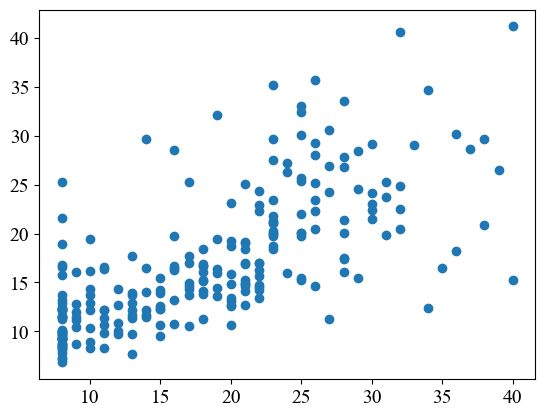

In [559]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, lr_y_pred)

(array([ 4.,  5., 18., 66., 74., 46., 17.,  3.,  3.,  2.]),
 array([-17.23733031, -13.03414182,  -8.83095334,  -4.62776485,
         -0.42457637,   3.77861211,   7.9818006 ,  12.18498908,
         16.38817757,  20.59136605,  24.79455454]),
 <BarContainer object of 10 artists>)

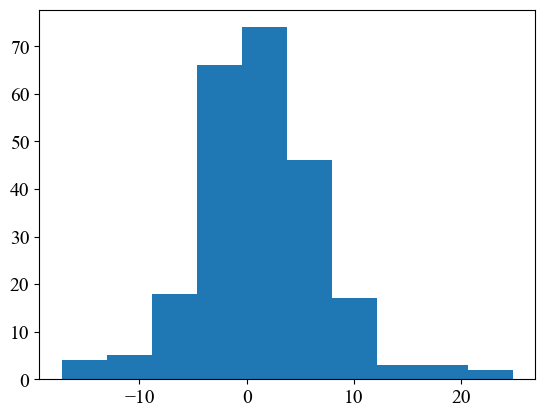

In [560]:
# Plot of residuals are normally distributed
lr_residuals = y_cog_test_imp.to_numpy() - lr_y_pred
plt.hist(lr_residuals)

In [561]:
# Residual Correlations
lr_ts_r = np.round(np.sqrt(lr_ts_r2), decimals = 2)

In [562]:
lr_aic = np.round(AIC_score(model = lr, y_true = y_cog_train_imp, y_pred = np.exp(lr.predict(X_cog_train_l))), decimals = 2)
lr_bic = np.round(BIC_score(model = lr, y_true = y_cog_train_imp, y_pred = np.exp(lr.predict(X_cog_train_l))), decimals = 2)


# Model 2A: L1 Lasso Regression

In [563]:
# Get predictions from test set
l1_cv_y_pred = np.exp(l1_cv.predict(X_cog_test_l))
#l1_cv_y_pred

In [564]:
l1_cv_y_pred

array([16.09191549, 19.60153569, 20.014381  , 11.00618006, 11.15107865,
       14.49715034,  8.81006144, 20.19495521, 12.66212313, 21.62566238,
       16.85651237, 10.74728718, 14.49699114,  9.55546415, 17.36320513,
       14.64557429, 22.41291968, 21.21928926, 25.78737599, 14.39800316,
        8.06346147, 14.42908931, 16.767518  , 11.36370283, 13.84906785,
       12.12532256,  8.62517293, 13.98789789, 31.86006507, 13.39977059,
       14.76216207, 14.95987447, 11.15808376,  9.98303886, 26.39863265,
       12.52403556, 11.07586845, 15.48436476, 25.68760935,  9.36878967,
       13.21739243,  9.00509369, 15.2525881 , 12.37491349,  6.95582714,
       29.57106228, 22.61341401, 18.43279099,  9.24518095, 16.0792491 ,
       20.72891338, 23.31512406,  9.30769038, 33.14139085,  9.83262177,
        9.37924748, 16.83937811, 19.44860354, 22.07686699, 13.78334153,
       14.50275321, 13.93588811, 21.6572385 , 11.34163115,  9.44381564,
       14.70905081, 12.44090477, 16.2373677 , 16.07215783, 12.43

In [565]:
# RMSE for test
l1_cv_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, l1_cv_y_pred, squared = False), decimals = 2)
l1_cv_ts_rmse

5.98

In [566]:
# RMSE for train
l1_cv_tr_rmse = np.round(mean_squared_error(y_cog_train_imp, np.exp(l1_cv.predict(X_cog_train_l)), squared = False), decimals = 2)
l1_cv_tr_rmse

5.3

In [567]:
#R2 for test
l1_cv_ts_r2 = np.round(r2_score(y_cog_test_imp, l1_cv_y_pred), decimals = 2)
l1_cv_ts_r2

0.48

In [568]:
#R2 for train
l1_cv_tr_r2 = np.round(r2_score(y_cog_train_imp, np.exp(l1_cv.predict(X_cog_train_l))), decimals = 2)
l1_cv_tr_r2

0.6

In [569]:
l1_cv_aic = np.round(AIC_score(model = l1_cv, y_true = y_cog_train_imp, y_pred = np.exp(l1_cv.predict(X_cog_train_l))), decimals = 2)



In [570]:
l1_cv_bic = np.round(BIC_score(model = l1_cv, y_true = y_cog_train_imp, y_pred = np.exp(l1_cv.predict(X_cog_train_l))), decimals = 2)


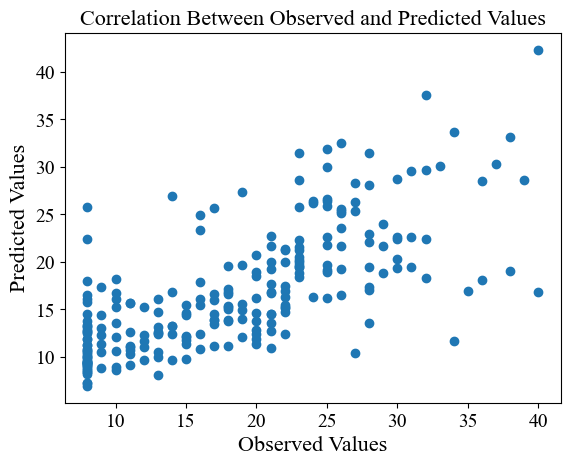

In [571]:
# Correlation plot between actual test values and predicted test values
x = y_cog_test_imp.to_numpy()
y = l1_cv_y_pred
plt.scatter(x, y)
plt.xlabel('Observed Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16)
plt.title('Correlation Between Observed and Predicted Values', fontsize = 16)
plt.savefig('ResidualCorrL1Reg.png')

(array([[ 0.,  0.,  0., ..., 19.,  8.,  0.],
        [ 0.,  0.,  0., ..., 10.,  2.,  0.],
        [ 0.,  0.,  0., ..., 10.,  2.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 59., 28., 11.],
        [ 0.,  0.,  0., ..., 27., 10.,  2.],
        [ 0.,  0.,  0., ..., 19.,  8.,  0.]]),
 array([-34.30861992, -27.57334064, -20.83806137, -14.10278209,
         -7.36750281,  -0.63222353,   6.10305575,  12.83833503,
         19.57361431,  26.30889359,  33.04417286]),
 <a list of 238 BarContainer objects>)

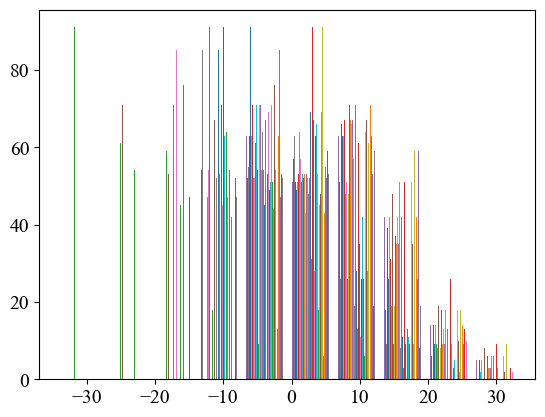

In [572]:
l1_cv_residuals = y_cog_test_imp.to_numpy() - l1_cv_y_pred
plt.hist(l1_cv_residuals)

In [573]:
# Residual Correlations
l1_cv_ts_r = np.round(np.sqrt(l1_cv_ts_r2), decimals = 2)

# Model 2B: Ridge Regression

In [574]:
# Get predictions from test set
l2_cv_y_pred = np.exp(l2_cv.predict(X_cog_test_l))
#l2_cv_y_pred

In [575]:
# RMSE for test
l2_cv_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, l2_cv_y_pred, squared = False), decimals = 2)
l2_cv_ts_rmse

6.04

In [576]:
#R2 for test
l2_cv_ts_r2 = np.round(r2_score(y_cog_test_imp, l2_cv_y_pred), decimals = 2)
l2_cv_ts_r2

0.47

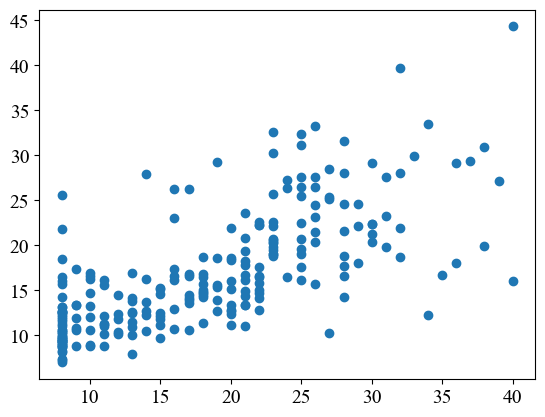

In [577]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, l2_cv_y_pred)

#plt.savefig('L2 Observed vs. Predicted.png')

(array([ 3.,  4., 18., 54., 77., 50., 23.,  3.,  4.,  2.]),
 array([-17.56022448, -13.40579296,  -9.25136143,  -5.0969299 ,
         -0.94249837,   3.21193315,   7.36636468,  11.52079621,
         15.67522774,  19.82965927,  23.98409079]),
 <BarContainer object of 10 artists>)

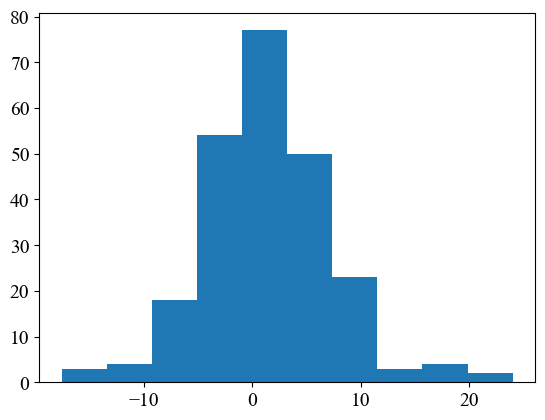

In [578]:
l2_cv_residuals = y_cog_test_imp.to_numpy() - l2_cv_y_pred
plt.hist(l2_cv_residuals)

In [579]:
# Residual Correlations
l2_cv_ts_r = np.round(np.sqrt(l2_cv_ts_r2), decimals = 2)

In [580]:
# RMSE for train
l2_cv_tr_rmse = np.round(mean_squared_error(y_cog_train_imp, np.exp(l2_cv.predict(X_cog_train_l)), squared = False), decimals = 2)
l2_cv_tr_rmse

5.23

In [581]:
#R2 for train
l2_cv_tr_r2 = np.round(r2_score(y_cog_train_imp, np.exp(l2_cv.predict(X_cog_train_l))), decimals = 2)
l2_cv_tr_r2


0.61

In [582]:
l2_cv_aic = np.round(AIC_score(model = l2_cv, y_true = y_cog_train_imp, y_pred = np.exp(l2_cv.predict(X_cog_train_l))), decimals = 2)
l2_cv_bic = np.round(BIC_score(model = l2_cv, y_true = y_cog_train_imp, y_pred = np.exp(l2_cv.predict(X_cog_train_l))), decimals = 2)


## Model 3: Decision Tree Regression

In [583]:
# Get predictions from test set
tree_y_pred = np.exp(tree_cog.predict(X_cog_test_pipe))
#tree_y_pred

In [584]:
# RMSE for test
tree_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, tree_y_pred, squared = False), decimals = 2)
tree_ts_rmse

6.65

In [585]:
#R2 for test
tree_ts_r2 = np.round(r2_score(y_cog_test_imp, tree_y_pred), decimals = 2)
tree_ts_r2

0.36

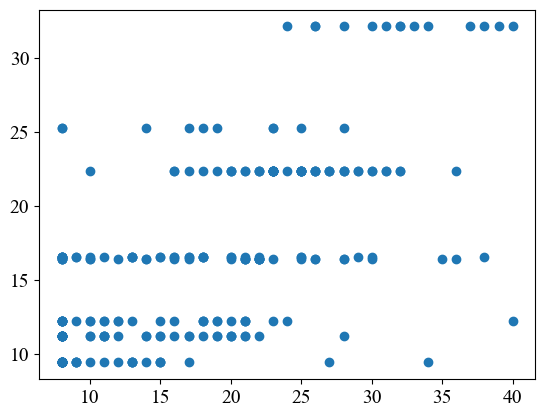

In [586]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, tree_y_pred)

(array([[ 0.,  0., 47., ..., 13.,  6.,  0.],
        [ 0., 76., 38., ...,  2.,  0.,  0.],
        [ 0.,  0., 47., ..., 13.,  6.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 37., 15.,  9.],
        [ 0.,  0., 47., ..., 13.,  6.,  0.],
        [ 0.,  0.,  0., ..., 23., 11.,  5.]]),
 array([-24.10752146, -18.63683542, -13.16614938,  -7.69546334,
         -2.2247773 ,   3.24590874,   8.71659478,  14.18728082,
         19.65796686,  25.1286529 ,  30.59933894]),
 <a list of 238 BarContainer objects>)

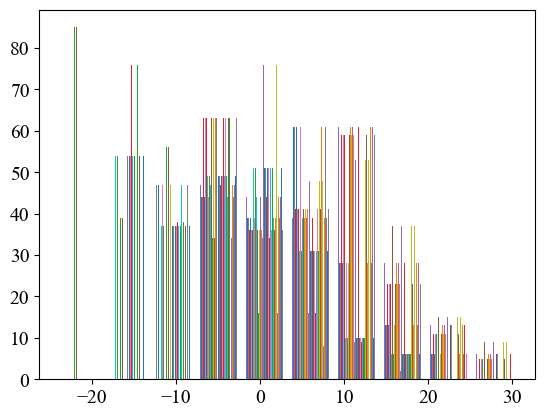

In [587]:
tree_residuals = y_cog_test_imp.to_numpy() - tree_y_pred
plt.hist(tree_residuals)

In [588]:
# Residual Correlations
tree_ts_r = np.round(np.sqrt(tree_ts_r2), decimals = 2)

In [589]:
# RMSE for train
tree_tr_rmse = np.round(mean_squared_error(y_cog_train_imp, np.exp(tree_cog.predict(X_cog_train_pipe)), squared = False), decimals = 2)
tree_tr_rmse


5.55

In [590]:
#R2 for train
tree_tr_r2 = np.round(r2_score(y_cog_train_imp, np.exp(tree_cog.predict(X_cog_train_pipe))), decimals = 2)
tree_tr_r2


0.56

In [591]:
tree_aic = 'NA'
tree_bic = 'NA'


## Model 4: KNN Regressor

In [592]:
# Get predictions from test set
knn_y_pred = np.exp(knn_cog.predict(X_cog_test_pipe))
#knn_y_pred

In [593]:
# RMSE for test
knn_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, knn_y_pred, squared = False), decimals = 2)
knn_ts_rmse

6.71

In [594]:
#R2 for test
knn_ts_r2 = np.round(r2_score(y_cog_test_imp, knn_y_pred), decimals = 2)
knn_ts_r2

0.35

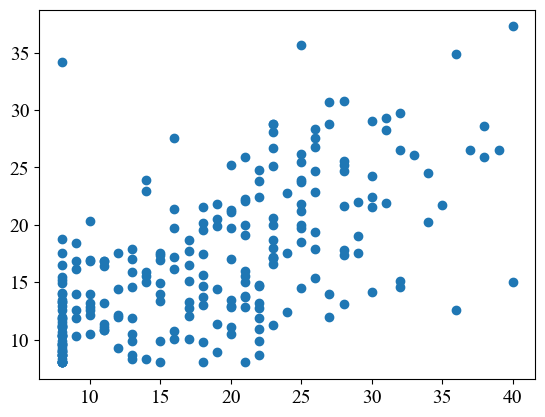

In [595]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, knn_y_pred)

(array([ 1.,  0.,  1., 21., 83., 56., 48., 21.,  5.,  2.]),
 array([-26.17013911, -21.05386558, -15.93759204, -10.82131851,
         -5.70504497,  -0.58877143,   4.5275021 ,   9.64377564,
         14.76004918,  19.87632271,  24.99259625]),
 <BarContainer object of 10 artists>)

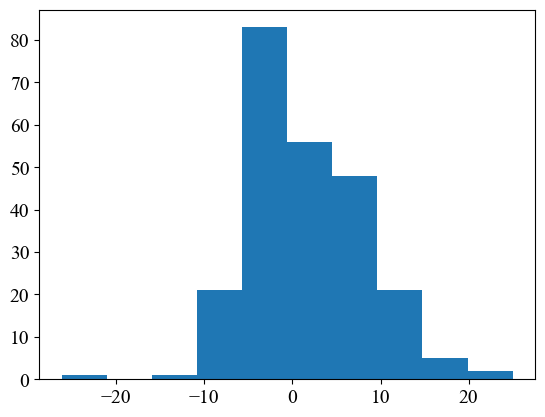

In [596]:
knn_residuals = y_cog_test_imp.to_numpy() - knn_y_pred
plt.hist(knn_residuals)

In [597]:
# Residual Correlations
knn_ts_r = np.round(np.sqrt(knn_ts_r2), decimals = 2)

In [598]:
# RMSE for train
knn_tr_rmse = np.round(mean_squared_error(y_cog_train_imp, np.exp(knn_cog.predict(X_cog_train_pipe)), squared = False), decimals = 2)
knn_tr_rmse

4.9

In [599]:
#R2 for train
knn_tr_r2 = np.round(r2_score(y_cog_train_imp, np.exp(knn_cog.predict(X_cog_train_pipe))), decimals = 2)
knn_tr_r2

0.66

In [600]:
knn_aic = 'NA'
knn_bic = 'NA'


In [601]:
np.exp(2.68)

14.585093295880792

## Table of Regression Performance Metrics

In [602]:
model_data = [
    {'Mod': 'LR', 'TrRMSE': lr_tr_rmse, 'TsRMSE': lr_ts_rmse, 'R': lr_ts_r, 
     'TrR2': lr_tr_r2, 'TsR2': lr_ts_r2, 'AIC': lr_aic},
    {'Mod': 'L2', 'TrRMSE': l2_cv_tr_rmse, 'TsRMSE': l2_cv_ts_rmse, 'R': l2_cv_ts_r, 
     'TrR2': l2_cv_tr_r2, 'TsR2': l2_cv_ts_r2, 'AIC': l2_cv_aic},
    {'Mod': 'L1', 'TrRMSE': l1_cv_tr_rmse, 'TsRMSE': l1_cv_ts_rmse, 'R': l1_cv_ts_r, 
     'TrR2': l1_cv_tr_r2,'TsR2': l1_cv_ts_r2, 'AIC': l1_cv_aic},
    {'Mod': 'Tree', 'TrRMSE': tree_tr_rmse, 'TsRMSE': tree_ts_rmse, 'R': tree_ts_r, 
     'TrR2': tree_tr_r2, 'TsR2': tree_ts_r2, 'AIC': tree_aic},
    {'Mod': 'KNN', 'TrRMSE': knn_tr_rmse, 'TsRMSE': knn_ts_rmse, 'R': knn_ts_r, 
     'TrR2': knn_tr_r2, 'TsR2': knn_ts_r2, 'AIC': knn_aic}
]

table = tabulate(model_data, headers='keys',tablefmt='fancy_grid')


In [603]:
print(table)

╒═══════╤══════════╤══════════╤══════╤════════╤════════╤═════════╕
│ Mod   │   TrRMSE │   TsRMSE │    R │   TrR2 │   TsR2 │ AIC     │
╞═══════╪══════════╪══════════╪══════╪════════╪════════╪═════════╡
│ LR    │     5.13 │     6.09 │ 0.68 │   0.63 │   0.46 │ 3396.42 │
├───────┼──────────┼──────────┼──────┼────────┼────────┼─────────┤
│ L2    │     5.23 │     6.04 │ 0.69 │   0.61 │   0.47 │ 3417.97 │
├───────┼──────────┼──────────┼──────┼────────┼────────┼─────────┤
│ L1    │     5.3  │     5.98 │ 0.69 │   0.6  │   0.48 │ 7794.02 │
├───────┼──────────┼──────────┼──────┼────────┼────────┼─────────┤
│ Tree  │     5.55 │     6.65 │ 0.6  │   0.56 │   0.36 │ NA      │
├───────┼──────────┼──────────┼──────┼────────┼────────┼─────────┤
│ KNN   │     4.9  │     6.71 │ 0.59 │   0.66 │   0.35 │ NA      │
╘═══════╧══════════╧══════════╧══════╧════════╧════════╧═════════╛


## Check for variance inflation

In [604]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_cog_train_l.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_cog_train_l.values, i) 
                          for i in range(len(X_cog_train_l.columns))] 
  
print(vif_data)

                     feature       VIF
0              pcs_diag_PASC  4.173804
1                  cluster_1  1.208911
2                  cluster_2  3.003363
3                  cluster_3  1.426564
4                  cluster_5  1.672048
5                  cluster_6  2.206829
6              vacc_bi_After  2.334603
7             vacc_bi_Before  3.217986
8                 tbi_prob_1  1.713376
9                 tbi_prob_2  1.118752
10                tbi_prob_3  1.111725
11      participant_type_Vet  1.755643
12              gender_NonBi  1.251347
13              gender_Trans  1.148029
14              gender_Woman  2.134284
15                race_Asian  1.323180
16                race_Black  1.350312
17         race_HI/PI/AL/Oth  1.223521
18                 race_More  1.159645
19         nicotine_status_1  1.410736
20            rehab_status_1  1.220085
21    unemployment_covid_Cov  1.217989
22  unemployment_covid_Unemp  1.494995
23     vaccine_menstrual_Yes  1.273872
24              med_acces

## Brain Fog in People with long-COVID Only

In [605]:
pcs_c_pasc = pcs_c.loc[pcs_c['pcs_diag'] == 'PASC']
pcs_c_pasc.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,rat_m_acc,rat_h_rt_mn,rat_h_rt_sd,rat_h_acc,sus_att,cpt_profile,vacc_bi,cardio_bi,cluster,promis_score
4,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,0.400000,33344.50,33970.473297,0.333333,2.0,2.0,After,1,5,12.0
6,Vet,63,Female,Woman,White,Non,2,0,0,Emp,...,0.000000,13866.74,3813.248883,0.200000,2.0,2.0,After,1,2,39.0
9,Vet,38,Male,Man,White,Non,3,0,0,Cov,...,0.166667,18190.20,10686.945314,0.166667,2.0,0.0,Before,1,2,31.0
10,Vet,68,Male,Man,White,Non,2,0,0,Unemp,...,1.000000,19109.25,20205.771624,0.500000,1.0,0.0,Before,1,5,8.0
11,Vet,60,Male,Man,White,Non,2,0,0,Emp,...,0.333333,34758.70,25530.409457,0.000000,3.0,2.0,Before,1,3,27.0


In [606]:
pcs_c_pasc.shape

(278, 79)

In [607]:
# Split the data into features (X) and the binary target variable (y).
X_cog = pcs_c_pasc[cog_all]

#Define outcome variable
y_cog = pcs_c_pasc[['promis_score']]

#Split data
X_cog_train, X_cog_test, y_cog_train, y_cog_test = train_test_split(X_cog, y_cog, train_size = 0.6, random_state=1)

In [608]:
X_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_train), 
                           columns = X_cog_train.columns.to_list())
y_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_train), 
                           columns = y_cog_train.columns.to_list())
X_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_test), 
                           columns = X_cog_test.columns.to_list())
y_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_test), 
                           columns = y_cog_test.columns.to_list())

In [609]:
#Fit pipeline to resampled data
X_cog_train_fit = cog_all_pipe.fit(X_cog_train_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_train_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_train_imp), columns = X_cog_cols)


#Fit pipeline to resampled data
X_cog_test_fit = cog_all_pipe.fit(X_cog_test_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_test_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_test_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_test_imp), columns = X_cog_cols)

In [610]:
X_cog_test_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pcs_diag_PASC             112 non-null    float64
 1   cluster_1                 112 non-null    float64
 2   cluster_2                 112 non-null    float64
 3   cluster_3                 112 non-null    float64
 4   cluster_4                 112 non-null    float64
 5   cluster_5                 112 non-null    float64
 6   cluster_6                 112 non-null    float64
 7   vacc_bi_After             112 non-null    float64
 8   vacc_bi_Before            112 non-null    float64
 9   vacc_bi_Never             112 non-null    float64
 10  tbi_prob_0                112 non-null    float64
 11  tbi_prob_1                112 non-null    float64
 12  tbi_prob_2                112 non-null    float64
 13  tbi_prob_3                112 non-null    float64
 14  participan

In [611]:
X_cog_train_l = X_cog_train_pipe.drop(['cluster_4', 'vacc_bi_None', 'tbi_prob_None', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp', 'cpt_profile_0.0'], axis = 1)
X_cog_test_l = X_cog_test_pipe.drop(['cluster_4', 'vacc_bi_None', 'tbi_prob_None', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp', 'cpt_profile_0.0'], axis = 1)

KeyError: "['vacc_bi_None', 'tbi_prob_None'] not found in axis"

In [ ]:
l1_cv = LassoCV(random_state=1, cv = 10)
l1_cv.fit(X_cog_train_l, np.log(y_cog_train_imp))

In [ ]:
l1_cv.alpha_

In [ ]:
l1_cv.intercept_

In [ ]:
d = {'Feature': pd.Series(X_cog_train_l.columns), 'Coefficient': pd.Series(l1_cv.coef_)}
df = pd.DataFrame(data=d).reindex(d['Coefficient'].abs().sort_values(ascending=False).index)
df.head(50)

In [ ]:
# Get predictions from test set
l1_cv_y_pred = np.exp(l1_cv.predict(X_cog_test_l))
#l1_cv_y_pred

In [ ]:
# RMSE for test
l1_cv_ts_rmse = np.round(mean_squared_error(y_cog_test_imp, l1_cv_y_pred, squared = False), decimals = 2)
l1_cv_ts_rmse

In [ ]:
#R2 for test
l1_cv_ts_r2 = np.round(r2_score(y_cog_test_imp, l1_cv_y_pred), decimals = 2)
l1_cv_ts_r2


In [ ]:
# Correlation plot between actual test values and predicted test values
x = y_cog_test_imp.to_numpy()
y = l1_cv_y_pred
plt.scatter(x, y)
plt.xlabel('Observed Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16)
plt.title('Correlation Between Observed and Predicted Values', fontsize = 16)
plt.savefig('ResidualCorrL1Reg.png')

## Drilling down to Behavioral Readouts

In [ ]:
vs_a_rt_mn_l
reat_rt_sum
type_rt_sum
rat_e_rt_mn

In [ ]:
plt.scatter(pcs_c['vs_a_rt_mn_l'], pcs_c['promis_score'])

In [ ]:
plt.plot(pcs_c['vs_a_rt_sd_l'])

In [ ]:
plt.scatter(pcs_c['read_rt_sum'], pcs_c['promis_score'])

In [ ]:
plt.plot(pcs_c['read_rt_sum'])

In [ ]:
plt.scatter(pcs_c['type_rt_sum'], pcs_c['promis_score'])

In [ ]:
plt.plot(pcs_c['type_rt_sum'])

In [ ]:
plt.scatter(pcs_c['rat_e_rt_mn'], pcs_c['promis_score'])

In [ ]:
plt.plot(pcs_c['rat_e_rt_mn'])

## Latent Cognitive Parameter Modeling

In [ ]:
!pip install git+https://github.com/lnccbrown/HSSM.git